In [1656]:
import pandas as pd

In [1657]:
df_em_1_token_10 = pd.read_csv('df_em_1_token_10.csv', sep=";")

In [1658]:
df_em_1_token_10

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
0,😂,5,1,smile,positive/negative,0,почему бы и нет 😂
1,😁,5,1,smile,positive/negative,0,как сесть на диету 😁
2,😁,6,1,smile,positive/negative,0,когда в душе ещё щенок 😁
3,😻,6,1,joy,positive,2,новые фотографии нюши просто огненные😻
4,😍,7,1,joy,positive,2,безумно красивая актриса - алина ланина 😍
...,...,...,...,...,...,...,...
9215,😄,5,1,smile,positive/negative,0,ряды эскортниц скоро пополнится 😄
9216,😂,7,1,smile,positive/negative,0,так он прав ты реально даун 😂
9217,🤔,7,1,no_emotion,neutral/skeptical,1,вы же не про меня?🤔
9218,🤔,9,1,no_emotion,neutral/skeptical,1,про кого пошутил то это не до комик🤔


In [1659]:
import pymorphy2

In [1660]:
morph = pymorphy2.MorphAnalyzer()

In [1661]:
#леммы c пунктуацией и эмодзи
def preprocess_lemma_em(text):
    tokens = text.lower().split()
    preprocessed_text = []
    for token in tokens:
        lemma = morph.parse(token)[0].normal_form
        #preprocessed_text.append(str(lemma)+"_"+str(class_))
        preprocessed_text.append(lemma)
    #return preprocessed_text
    return " ".join(preprocessed_text)

In [1662]:
df_em_1_token_10['clean_text'][0]

'почему бы и нет 😂'

In [1663]:
preprocess_lemma_em(df_em_1_token_10['clean_text'][0])

'почему бы и нет 😂'

In [1664]:
df_em_1_token_10['text_lemma'] = df_em_1_token_10.apply(lambda row: preprocess_lemma_em(row['clean_text']), axis=1)

In [1665]:
df_em_1_token_10

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text,text_lemma
0,😂,5,1,smile,positive/negative,0,почему бы и нет 😂,почему бы и нет 😂
1,😁,5,1,smile,positive/negative,0,как сесть на диету 😁,как сесть на диета 😁
2,😁,6,1,smile,positive/negative,0,когда в душе ещё щенок 😁,когда в душа ещё щенок 😁
3,😻,6,1,joy,positive,2,новые фотографии нюши просто огненные😻,новый фотография нюша просто огненные😻
4,😍,7,1,joy,positive,2,безумно красивая актриса - алина ланина 😍,безумно красивый актриса - алина ланина 😍
...,...,...,...,...,...,...,...,...
9215,😄,5,1,smile,positive/negative,0,ряды эскортниц скоро пополнится 😄,ряд эскортница скоро пополниться 😄
9216,😂,7,1,smile,positive/negative,0,так он прав ты реально даун 😂,так он право ты реально даун 😂
9217,🤔,7,1,no_emotion,neutral/skeptical,1,вы же не про меня?🤔,вы же не про меня?🤔
9218,🤔,9,1,no_emotion,neutral/skeptical,1,про кого пошутил то это не до комик🤔,про кто пошутить то это не до комик🤔


## Distribution of top n-grams

In [1666]:
emoji_dict = {"0":"smile positive/negative", "1":"no_emotion neutral/skeptical", "2":"joy positive",
              "3":"no_emotion positive/negative", "4":"sadness negative", "5":"fear negative",
              "6":"shame negative","7":"anger negative", "8":"disgust negative",
              "9":"surprise positive/negative","10":"disgust neutral/skeptical", "11":"surprise negative",
              "12":"no_emotion negative","13":"sadness positive/negative", "14":"fear positive/negative"}

In [1667]:
# Creating individual dataframes of different emotions
smile_positive_negative = df_em_1_token_10[df_em_1_token_10['class']==0]['text_lemma']
no_emotion_neutral_skeptical = df_em_1_token_10[df_em_1_token_10['class']==1]['text_lemma']
joy_positive = df_em_1_token_10[df_em_1_token_10['class']==2]['text_lemma']
no_emotion_positive_negative = df_em_1_token_10[df_em_1_token_10['class']==3]['text_lemma']
sadness_negative = df_em_1_token_10[df_em_1_token_10['class']==4]['text_lemma']
fear_negative = df_em_1_token_10[df_em_1_token_10['class']==5]['text_lemma']
shame_negative = df_em_1_token_10[df_em_1_token_10['class']==6]['text_lemma']
anger_negative = df_em_1_token_10[df_em_1_token_10['class']==7]['text_lemma']
disgust_negative = df_em_1_token_10[df_em_1_token_10['class']==8]['text_lemma']
surprise_positive_negative = df_em_1_token_10[df_em_1_token_10['class']==9]['text_lemma']
disgust_neutral_skeptical = df_em_1_token_10[df_em_1_token_10['class']==10]['text_lemma']
surprise_negative = df_em_1_token_10[df_em_1_token_10['class']==11]['text_lemma']
no_emotion_negative = df_em_1_token_10[df_em_1_token_10['class']==12]['text_lemma']
sadness_positive_negative = df_em_1_token_10[df_em_1_token_10['class']==13]['text_lemma']
fear_positive_negative = df_em_1_token_10[df_em_1_token_10['class']==14]['text_lemma']

In [1668]:
smile_positive_negative

0                                   почему бы и нет 😂
1                                как сесть на диета 😁
2                            когда в душа ещё щенок 😁
8                                    кузьмин умница 😊
9                                 токсичный дурилка 😅
                            ...                      
9213                   судить по ты ты фанат майот ?😀
9214                            не нервничать малый 😀
9215               ряд эскортница скоро пополниться 😄
9216                   так он право ты реально даун 😂
9219    ты это хороший знать что в весь мир слушать 🤣
Name: text_lemma, Length: 5954, dtype: object

In [1669]:
len(smile_positive_negative)

5954

In [1670]:
no_emotion_neutral_skeptical

112         папарацци поймать софи тёрнер с муж и дочка 😏
116     розить мак - дублёрша дейнерис, который превзо...
138                              тут без эксперт никуда 🙄
152                            цена на iphone год назад 😑
274               аня седакова хвастаться свой прелесть 😏
                              ...                        
9167                   смешно с ваш грамматика пятёрка .🤔
9189    я так понимаю, это касаться только мама и доче...
9197            клуня же обещать большой не сниматься.. 🤔
9217                                  вы же не про меня?🤔
9218                 про кто пошутить то это не до комик🤔
Name: text_lemma, Length: 1022, dtype: object

In [1671]:
len(no_emotion_neutral_skeptical)

1022

In [1672]:
joy_positive

3                  новый фотография нюша просто огненные😻
4               безумно красивый актриса - алина ланина 😍
5       подружка клава кока и марь краймбррать отдыхат...
6                                                 слава❤️
7           пeвицa maкsий поделилacь снимкaй cвoиx дoчeк😍
                              ...                        
9156                      по я так она и так прекрасный 😍
9158             я тоже всегда так говорить верный слова🤗
9187      я очень любить россию, хотеть друг из россии🇷🇺❤
9188          оставить её в покое, не не надо завидовать🤗
9194    муж должный молодой быть,чтоба долгий жена рад...
Name: text_lemma, Length: 724, dtype: object

In [1673]:
len(joy_positive)

724

In [1674]:
no_emotion_positive_negative

38                         приключение джеки чан шедевр 🤤
39                                        олд на месте? 😎
60                                        олд на месте? 😎
117     шикарный фильм легендарный режиссёр - ридлить ...
130     этот датчанин чересчур хорош: мадс миккельсный...
                              ...                        
9133                               согласный на 💯 процент
9135                         это я только не беременный 😝
9141                       скорее всего! становиться ей!😜
9163                          откуда у вы такой интерес?🙉
9192                                         мутанткать 😝
Name: text_lemma, Length: 486, dtype: object

In [1675]:
len(no_emotion_positive_negative)

486

In [1676]:
sadness_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


19                        талантливый быть актёр 😔
37                                  зелёный миля 💔
40                              николай петрович 💔
53                                грустный фильм 😔
55                            хороший быть актёр 💔
                           ...                    
8913    такой хороший оптимистичный начало... эх 😩
8939                                   прийдеться😫
8979                               да у я ипотека😔
9026                           соболезнование вам😔
9064                                     гены....😢
Name: text_lemma, Length: 365, dtype: object

In [1677]:
len(sadness_negative)

365

In [1678]:
fear_negative

50                                 мужчина тоже плакать 😰
108     джeйcон cтэйтема в супеpожидаемoм фильмe гaя p...
149     джeйcон cтэйтема в супеpожидаемoм фильмe гaя p...
281                            kристина асмуса не узнать😱
526       джeйcoн cтэйтeм в cyпepожидaeм фильмe гaя pич 😱
                              ...                        
8706     не удаться бы скрытно добавить- запах выдать бы😰
8707             😰 я о такой и не подумала. сочувствовать
8779                                                ого 😨
8962               парикмахерский сжечь😱длить дизинфекция
9073                                            телефон☠️
Name: text_lemma, Length: 122, dtype: object

In [1679]:
len(fear_negative)

122

In [1680]:
shame_negative

90                                   девочка вундеркинд 😳
150                          зачем они так много солений😳
157                      а что так можно? взять и пойти 😳
292                дать борисов и последствие липосакции😳
307     филипп киркоров после пластический операция си...
                              ...                        
8991                           стесняться спросить кого?😳
9014                       у вы там один малыш или двое?😳
9037                       если это правда то я в ах...е😳
9171       😳капец мышление ну тогда и женщина зачем тебе!
9202                     я увидеть её без макияж впервые😳
Name: text_lemma, Length: 122, dtype: object

In [1681]:
len(shame_negative)

122

In [1682]:
anger_negative

596           каждый день я ждать вечера, чтобы он снять😡
781                              что это, если не жиза? 😡
794                                     свежак это день 😈
851                                      шикарный саунд 😈
855                              добрый утро, подписчик 😈
                              ...                        
7542            вы как фильм смотреть , под водка чтоли?😡
7600               ой мля кызык жернд бтпкалада за. бал 😡
8253                              угу. а спросить не мог😈
8354    плохо вычислить кто это и распотрошить мусор п...
8732               а кто-то рожать и как котёнок топить 😡
Name: text_lemma, Length: 94, dtype: object

In [1683]:
len(anger_negative)

94

In [1684]:
disgust_negative

1851    распаковка если она можно таковой назвать🤮
1965                                   🤢 вот тварь
1979                              глист особенно 🤢
2100        мой коммент обледенеть на ваш сумочке💩
2398                      ходячий пропоганда лгбт🤮
                           ...                    
7878         я 43 но иногда хреновый 🤢 утром))))))
8054                           собака ещё и 💩 есть
9003             ах ты дрянь такая. фу такой быть🤢
9186                              такой страшный 🤢
9212             какой музыка ,такий и слушатель 🤢
Name: text_lemma, Length: 86, dtype: object

In [1685]:
len(disgust_negative)

86

In [1686]:
surprise_positive_negative

538     это просто бомбезной сочетание вкус 💣
552     это просто бомбезной сочетание вкус 💣
665        когда ты не бояться показать себя😮
702     вот это перевоплощение😲 вы бы узнали?
717       иногда даже чересчур больший жертв😮
                        ...                  
8220             тусклый нисколька нилутьше.🙀
8974              она че девственница была? 😲
9065                        вы я написать ? 😲
9129                                что 500?😲
9203                           вот это бёдра😮
Name: text_lemma, Length: 103, dtype: object

In [1687]:
len(surprise_positive_negative)

103

In [1688]:
disgust_neutral_skeptical

25                                  xopoнуть быть aктep 😒
67             ecть тyт тe, ктo eщe пoмнить этиx peбят? 😒
2105    у мы всё равно нет круглосуточный поэтому без ...
2329                                   как же вы правы.😒.
2736       человек много знать за что поплатиться жизнь 😒
3050                                         че реально 😒
3089                                 ну все, кабзда.... 😒
3697    полотенце завернуть держит. что за извращенец ...
3768                     капец, что же с она случиться ?😒
3874                          веседа vk звонки. реклама 😒
4001                                   быть ждать тогда 😒
4082    значит чел кто залить рендерир в плохой качест...
4104                                              ойойой😒
4374                     под комментарий иметься такая? 😒
4447                                      вот так значит😒
4615                            как её включить я не пон😒
4642                   поздравлять я ещё не дать промый 😒
4781          

In [1689]:
len(disgust_neutral_skeptical)

36

In [1690]:
surprise_negative

96                           он уже на минуточка 60 год 🤯
582                         оказывается, что всё просто 😯
663                            когда ты нет смысл худеть😵
743                громкий инсайд от некоглай и ивангай 🤯
749                               ах*еть, уже 1 февраль 😯
756     тендерлибай снять маска на свой стрим максимал...
761     амин дропнуть клип, в который в первый раз сня...
764     стас барецкий напасть на иван зоть 😧 распростр...
830                                 слушать и кайфовать 🤯
849                                отведать же пища бог 😧
951     когда до быть намного привлекательный чем после 😵
976     показать свой гардероб да у я квартира маленьк...
1058                        скриптонит и он новый образ 🤯
1065    хасбик выкинуть из окно машины, просьба смотре...
1070    мбапп заценить удар неймара особый выражение л...
1135                     звезда который обожать фотошоп 😵
1159    всегда быть интересно, какой дурак поехать сни...
1529          

In [1691]:
len(surprise_negative)

44

In [1692]:
no_emotion_negative

738          премьера трек blago white — «blya zaebali» 🤬
1041                     не нужный я большой твой банан 🥱
1044                                  хэйтеры, откисайт 🥱
2553    эх, почему большой «больший гонки» не показыва...
2592       ржал? пацан пиздим он он на прянить газовать 🤧
2628          но саша я понимать без мамный трудно быть 🤧
2639                 ох а как я раздражать этот коллаж 🤬.
3255                          в махачкала пусть так едет😷
3816                                  что это за ху*ня? 🤧
3917    приложение работать же тут уже вопрос к тем кт...
3937                                            согласна🤬
4064          зачем убрать боковой меню? не-на-ви-жу!!! 🤬
4089      у я нет проблема с интернетом, вернуть музыка 🤧
4133                                       в наш сердцах🤧
4190                реклама большой пожалуйста, мало её 🤬
4224              валидацию? если да то и её обойти гады🤬
4317                                      уже 6 год ждём🤧
4383    когда 

In [1693]:
len(no_emotion_negative)

33

In [1694]:
sadness_positive_negative

1026                                            по факт 🥲
1051                     в телевизор ничего не меняться 🥲
1639                  повезти же кто-то с такой друзьями🥲
1955                                             полгода🥲
1998                        ты слишком взрослый для меня🥲
3124    вообще это возможно, но голос прайма быть совс...
3689             в второй часть разочароваться событиями🥲
4069                                           в профиле🥲
4074                                  забаганый продукт 🥲
4318                          я тоже 🥲 и с телефон ошибка
4320                               🥲 ну вот опять санкция
4421                                    го вз валентинки🥲
4422                                       вз валентинки🥲
5080    всё , все, не продолжать , а то заплатить сейч...
5089                         завтра пошпирлять на работу🥲
5648                     про игра как боженька смолвить 🥲
5965                                    прослезилась... 🥲
6994          

In [1695]:
len(sadness_positive_negative)

20

In [1696]:
fear_positive_negative

983     парень собраться и набить логотип - haunted fa...
1607                                        до мурашек! 👻
1941                                              голум 👽
3424                          у они уже в мода быть это 👻
4902                                               i am 👻
5694                      ты типо кокоина в вк раздаёшь?👽
6410                 чем мелкий блоха тем больной кусает👾
7556                     костюм в сериал из гуманитарка 👻
8725                призрак кондиционер преследовать её 👻
Name: text_lemma, dtype: object

In [1697]:
len(fear_positive_negative)

9

In [1882]:
stopWords = set()

In [1883]:
with open('swl.txt', 'r', encoding='utf8') as swl:
    for i in swl:
        i = i.replace('\n','')
        stopWords.add(i)

In [1884]:
stop_words = [u'я', u'а', u'да', u'тебе', u'мне', u'ты', u'у', u'на' 
            , u'который', u'давай', u'короче', u'кажется', u'вообще',
            u'чет', u'свои', u'наше', u'хотя', u'такое', u'например', u'кароч', u'как-то',
            u'нам', u'всем', u'оно', u'своем', u'про', u'вы', u'м', u'тд',
            u'вся', u'кто-то', u'что-то', u'вам', u'это', u'эта', u'эти', u'этот', u'как', u'мы',
            u'самые', u'твоем', u'ваша', u'кстати', u'вроде', u'типа', u'пока', u'ок',u'в',
            u'б',u'г',u'д',u'е',u'ж',u'з',u'й',u'к',u'л',u'ф',u'н',u'о',u'п',u'р',u'с',u'т',u'ч',u'ц',u'ч',
            u'ш',u'щ',u'ь',u'ъ',u'ы',u'э','ю', 'https', 'ru', '00', 'com', '10', 'http', '2019', 'vk', '2022',
            u'вконтакте', u'илья', u'соболев', u'соболев', u'до', u'что', u'её', u'хейль', u'болдуин' , 'zenly', u'вк',
            u'pич', u'джeйcон', u'cтэйтема', u'асмуса', 'джeйcoн', u'филипп', u'киркоров', '2023', 'ecть', 'тyт',
            'тe', 'ктo', 'eщe', 'этиx', '60', 'blago', 'white', 'blya', 'zaebali' , u'меня', 'haunted',
            'family', 'life', 'nrmusicru', 'am', u'джек', u'софи', u'тёрнер', u'мак', u'дейнерис',
            u'аня', u'седакова', u'алина', u'ланина', 'deep', 'house', u'клава', u'кока', 'ludovico', 'einaudi',
            'me', 'i10veyou', 'record', 'club', 'programms', u'джеки', u'чан', u'николай', u'петрович',
            'yung', 'trappa', 'kристина', 'cтэйтeм', u'борисов', u'нильсон', u'лести', u'маруся', 'new', 'russian',
            'megamix', u'некоглай', u'ивангай', u'тендерлибай', u'пиздим' ,'40', 'gdzie', 'dla', 'ciebie', 'chamstwo',
           '44', u'светлана', u'камынина', u'анастасия', u'волочкова', u'писюху', u'розить', u'еть', 'cyпepгepoь', 'cвuние',
           u'кимбереть', u'гарнер', u'кендалл', u'дженнер', u'бри', u'санс', u'старк', u'всю', u'нюша', u'ридлить', u'скотт',
            u'мадс', u'миккельсный', '99', u'хoлли', u'бэйль', u'съёмкaха', u'иван', u'ургантом', u'коля',
           u'алиэкспресс', u'мн', u'азамат', u'ольга', u'серябкина', u'эвелона', u'генсуха', u'мазерать', u'овать',
           u'оля', u'бузов', u'емельяненко', u'октагон', 'oчepeднoть', 'disney', u'овный', u'пушкина', u'веседа',
           u'рендерир', u'очь', u'агата', u'стас', u'барецкий', u'зоть', u'скриптонит', u'хасбик', u'саша', u'ви', u'жу',
           u'сидень', u'суиня', u'барби', u'феррейра', 'comedy', 'woman', u'мария', u'кравченко', u'меладзе',
            u'марь', u'краймбррать', 'maкsий', 'снимкaй', u'cвoиx', u'кузьмин', u'галь', u'гадот', u'эмма',
           u'мамасит', u'сальма', u'хайка', 'ferrero', 'rocher', u'двадцать', u'семь', u'пэрис', u'хилтон', u'памела',
            u'андерсон', 'джeйсoн', 'стэйтeм', u'кавер', u'амин', u'белла', u'хадид', u'филлипа', u'хре', u'нь', u'два',
            u'2017ещё', u'патинсоном', u'мастурбировать', u'котья', u'них', u'него', u'мбапп', u'неймара',
             u'первый', u'олд', u'второй', u'зале']         

In [1885]:
for word in stop_words:
    stopWords.add(word)

In [1886]:
from sklearn.feature_extraction.text import CountVectorizer

In [1887]:
# Code to calculate ngrams
# source of code : https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

def get_top_n_gram(corpus, ngram_range, n=None, with_stop_words=True):
    if with_stop_words:
        vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    else:
        vec = CountVectorizer(ngram_range=ngram_range,stop_words = stopWords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [1888]:
# calculating unigrmas, bigrams, trigrams and tetragrmas for all given emotions

In [1889]:
# with stop words

In [1890]:
smile_positive_negative_unigrams = get_top_n_gram(smile_positive_negative.values,(1,1),7)[2:]
no_emotion_neutral_skeptical_unigrams = get_top_n_gram(no_emotion_neutral_skeptical.values,(1,1),7)[2:]
joy_positive_unigrams = get_top_n_gram(joy_positive.values,(1,1),7)[2:]
no_emotion_positive_negative_unigrams = get_top_n_gram(no_emotion_positive_negative.values,(1,1),7)[2:]
sadness_negative_unigrams = get_top_n_gram(sadness_negative.values,(1,1),7)[2:]
fear_negative_unigrams = get_top_n_gram(fear_negative.values,(1,1),7)[2:]
shame_negative_unigrams = get_top_n_gram(shame_negative.values,(1,1),7)[2:]
anger_negative_unigrams = get_top_n_gram(anger_negative.values,(1,1),7)[2:]
disgust_negative_unigrams = get_top_n_gram(disgust_negative.values,(1,1),7)[2:]
surprise_positive_negative_unigrams = get_top_n_gram(surprise_positive_negative.values,(1,1),7)[2:]
disgust_neutral_skeptical_unigrams = get_top_n_gram(disgust_neutral_skeptical.values,(1,1),7)[2:]
surprise_negative_unigrams = get_top_n_gram(surprise_negative.values,(1,1),7)[2:]
no_emotion_negative_unigrams = get_top_n_gram(no_emotion_negative.values,(1,1),7)[2:]
sadness_positive_negative_unigrams = get_top_n_gram(sadness_positive_negative.values,(1,1),7)[2:]
fear_positive_negative_unigrams = get_top_n_gram(fear_positive_negative.values,(1,1),7)[2:]

In [1891]:
# no stop words

In [1892]:
smile_positive_negative_unigrams = get_top_n_gram(smile_positive_negative.values,(1,1),10,False)[2:]
no_emotion_neutral_skeptical_unigrams = get_top_n_gram(no_emotion_neutral_skeptical.values,(1,1),10,False)[2:]
joy_positive_unigrams = get_top_n_gram(joy_positive.values,(1,1),10,False)[2:]
no_emotion_positive_negative_unigrams = get_top_n_gram(no_emotion_positive_negative.values,(1,1),10,False)[2:]
sadness_negative_unigrams = get_top_n_gram(sadness_negative.values,(1,1),10,False)[2:]
fear_negative_unigrams = get_top_n_gram(fear_negative.values,(1,1),10,False)[2:]
shame_negative_unigrams = get_top_n_gram(shame_negative.values,(1,1),10,False)[2:]
anger_negative_unigrams = get_top_n_gram(anger_negative.values,(1,1),10,False)[2:]
disgust_negative_unigrams = get_top_n_gram(disgust_negative.values,(1,1),10,False)[2:]
surprise_positive_negative_unigrams = get_top_n_gram(surprise_positive_negative.values,(1,1),10,False)[2:]
disgust_neutral_skeptical_unigrams = get_top_n_gram(disgust_neutral_skeptical.values,(1,1),10,False)[2:]
surprise_negative_unigrams = get_top_n_gram(surprise_negative.values,(1,1),10,False)[2:]
no_emotion_negative_unigrams = get_top_n_gram(no_emotion_negative.values,(1,1),10,False)[2:]
sadness_positive_negative_unigrams = get_top_n_gram(sadness_positive_negative.values,(1,1),10,False)[2:]
fear_positive_negative_unigrams = get_top_n_gram(fear_positive_negative.values,(1,1),10,False)[2:]

In [1893]:
smile_positive_negative_unigrams

[('фильм', 66),
 ('большой', 49),
 ('человек', 49),
 ('фото', 47),
 ('жизнь', 37),
 ('новый', 36),
 ('написать', 36),
 ('понять', 35)]

In [1894]:
no_emotion_neutral_skeptical_unigrams

[('смотреть', 14),
 ('человек', 11),
 ('делать', 11),
 ('интересно', 10),
 ('посмотреть', 9),
 ('большой', 9),
 ('понять', 9),
 ('ребёнок', 9)]

In [1895]:
joy_positive_unigrams

[('отмечаться', 17),
 ('новый', 16),
 ('спит', 15),
 ('малыш', 14),
 ('красотка', 12),
 ('день', 12),
 ('любить', 11),
 ('добрый', 10)]

In [1896]:
no_emotion_positive_negative_unigrams

[('согласный', 8),
 ('горячо', 7),
 ('время', 6),
 ('добрый', 6),
 ('утро', 6),
 ('сэр', 6),
 ('трек', 6),
 ('горячий', 6)]

In [1897]:
sadness_negative_unigrams

[('хороший', 8),
 ('бедный', 7),
 ('жизнь', 6),
 ('работать', 6),
 ('сегодня', 5),
 ('брат', 5),
 ('время', 5),
 ('день', 5)]

In [1898]:
fear_negative_unigrams

[('максимально', 3),
 ('жуть', 3),
 ('смотреть', 3),
 ('супеpожидаемoм', 2),
 ('узнать', 2),
 ('показалось', 2),
 ('делать', 2),
 ('выглядеть', 2)]

In [1899]:
shame_negative_unigrams

[('женщина', 2),
 ('жить', 2),
 ('капец', 2),
 ('впервые', 2),
 ('человек', 2),
 ('серьёзно', 2),
 ('ужас', 2),
 ('девочка', 1)]

In [1900]:
anger_negative_unigrams

[('саунд', 2),
 ('добрый', 2),
 ('хороший', 2),
 ('хайп', 2),
 ('чёткий', 2),
 ('закрыть', 2),
 ('мусор', 2),
 ('новый', 2)]

In [1901]:
disgust_negative_unigrams

[('лгбт', 2),
 ('сериал', 2),
 ('смотреть', 2),
 ('редкостный', 2),
 ('качество', 2),
 ('чат', 2),
 ('серия', 2),
 ('распаковка', 1)]

In [1902]:
surprise_positive_negative_unigrams

[('бомба', 4),
 ('трек', 4),
 ('бомбезной', 3),
 ('сочетание', 3),
 ('вкус', 3),
 ('слышать', 3),
 ('пятница', 3),
 ('пушка', 3)]

In [1903]:
disgust_neutral_skeptical_unigrams

[('часть', 2),
 ('xopoнуть', 1),
 ('aктep', 1),
 ('пoмнить', 1),
 ('peбят', 1),
 ('круглосуточный', 1),
 ('особый', 1),
 ('разница', 1)]

In [1904]:
surprise_negative_unigrams

[('маска', 2),
 ('минуточка', 1),
 ('оказывается', 1),
 ('смысл', 1),
 ('худеть', 1),
 ('громкий', 1),
 ('инсайд', 1),
 ('февраль', 1)]

In [1905]:
no_emotion_negative_unigrams

[('премьера', 1),
 ('трек', 1),
 ('нужный', 1),
 ('банан', 1),
 ('хэйтеры', 1),
 ('откисайт', 1),
 ('больший', 1),
 ('гонки', 1)]

In [1906]:
sadness_positive_negative_unigrams

[('факт', 1),
 ('телевизор', 1),
 ('меняться', 1),
 ('повезти', 1),
 ('друзьями', 1),
 ('полгода', 1),
 ('взрослый', 1),
 ('голос', 1)]

In [1907]:
fear_positive_negative_unigrams

[('набить', 1),
 ('логотип', 1),
 ('мурашек', 1),
 ('голум', 1),
 ('мода', 1),
 ('типо', 1),
 ('кокоина', 1),
 ('раздаёшь', 1)]

In [1908]:
#bigrams

In [1909]:
# with stop words

In [1910]:
smile_positive_negative_bigrams = get_top_n_gram(smile_positive_negative.values,(2,2),7)[2:]
no_emotion_neutral_skeptical_bigrams = get_top_n_gram(no_emotion_neutral_skeptical.values,(2,2),7)[2:]
joy_positive_bigrams = get_top_n_gram(joy_positive.values,(2,2),7)[2:]
no_emotion_positive_negative_bigrams = get_top_n_gram(no_emotion_positive_negative.values,(2,2),7)[2:]
sadness_negative_bigrams = get_top_n_gram(sadness_negative.values,(2,2),7)[2:]
fear_negative_bigrams = get_top_n_gram(fear_negative.values,(2,2),7)[2:]
shame_negative_bigrams = get_top_n_gram(shame_negative.values,(2,2),7)[2:]
anger_negative_bigrams = get_top_n_gram(anger_negative.values,(2,2),7)[2:]
disgust_negative_bigrams = get_top_n_gram(disgust_negative.values,(2,2),7)[2:]
surprise_positive_negative_bigrams = get_top_n_gram(surprise_positive_negative.values,(2,2),7)[2:]
disgust_neutral_skeptical_bigrams = get_top_n_gram(disgust_neutral_skeptical.values,(2,2),7)[2:]
surprise_negative_bigrams = get_top_n_gram(surprise_negative.values,(2,2),7)[2:]
no_emotion_negative_bigrams = get_top_n_gram(no_emotion_negative.values,(2,2),7)[2:]
sadness_positive_negative_bigrams = get_top_n_gram(sadness_positive_negative.values,(2,2),7)[2:]
fear_positive_negative_bigrams = get_top_n_gram(fear_positive_negative.values,(2,2),7)[2:]

In [1911]:
# no stop words

In [2003]:
smile_positive_negative_bigrams = get_top_n_gram(smile_positive_negative.values,(2,2),10,False)[2:]
no_emotion_neutral_skeptical_bigrams = get_top_n_gram(no_emotion_neutral_skeptical.values,(2,2),10,False)[2:]
joy_positive_bigrams = get_top_n_gram(joy_positive.values,(2,2),10,False)[2:]
no_emotion_positive_negative_bigrams = get_top_n_gram(no_emotion_positive_negative.values,(2,2),10,False)[2:]
sadness_negative_bigrams = get_top_n_gram(sadness_negative.values,(2,2),10,False)[2:]
fear_negative_bigrams = get_top_n_gram(fear_negative.values,(2,2),10,False)[2:]
shame_negative_bigrams = get_top_n_gram(shame_negative.values,(2,2),10,False)[2:]
anger_negative_bigrams = get_top_n_gram(anger_negative.values,(2,2),20,False)[2:]
disgust_negative_bigrams = get_top_n_gram(disgust_negative.values,(2,2),10,False)[2:]
surprise_positive_negative_bigrams = get_top_n_gram(surprise_positive_negative.values,(2,2),10,False)[2:]
disgust_neutral_skeptical_bigrams = get_top_n_gram(disgust_neutral_skeptical.values,(2,2),10,False)[2:]
surprise_negative_bigrams = get_top_n_gram(surprise_negative.values,(2,2),10,False)[2:]
no_emotion_negative_bigrams = get_top_n_gram(no_emotion_negative.values,(2,2),10,False)[2:]
sadness_positive_negative_bigrams = get_top_n_gram(sadness_positive_negative.values,(2,2),10,False)[2:]
fear_positive_negative_bigrams = get_top_n_gram(fear_positive_negative.values,(2,2),10,False)[2:]

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['авт', 'адм', 'ак', 'акад', 'богу', 'бу', 'буль', 'вашему', 'вв', 'вкз', 'воскресеньепредновогодний', 'вост', 'всякому', 'гг', 'гор', 'гос', 'деп', 'дисс', 'дол', 'долл', 'другому', 'европ', 'ежедн', 'елки', 'жен', 'зап', 'заруб', 'зда', 'здец', 'изд', 'иному', 'иностр', 'инст', 'канд', 'кей', 'кис', 'корп', 'кх', 'кэй', 'миним', 'мое', 'моему', 'моск', 'муж', 'мухры', 'нашему', 'нед', 'нить', 'палки', 'паф', 'пер', 'пиф', 'пос', 'просп', 'ра', 'рам', 'руб', 'своему', 'стр', 'твоему', 'тел', 'терр', 'тик', 'тов', 'тра', 'тс', 'тт', 'ту', 'тыс', 'хухры', 'чегой', 'черт', 'чик', 'чтой', 'экз', 'яй'] not in stop_words.
  warnings.warn(


In [1913]:
smile_positive_negative_bigrams

[('следить новость', 6),
 ('тест возраст', 4),
 ('фильм стоить', 4),
 ('фильм смотреть', 4),
 ('хороший фильм', 4),
 ('ждать продолжение', 3),
 ('день жизнь', 3),
 ('звучать теории', 3)]

In [1914]:
no_emotion_neutral_skeptical_bigrams

[('муж дочка', 3),
 ('красивый девочка', 3),
 ('девочка расти', 2),
 ('чувство свидетельница', 2),
 ('свидетельница затмить', 2),
 ('затмить невеста', 2),
 ('чебурашка девочка', 2),
 ('сериал хороший', 2)]

In [1915]:
joy_positive_bigrams

[('безумно красивый', 3),
 ('красивый актриса', 3),
 ('натуральный красотка', 3),
 ('день рождение', 3),
 ('лaйк cмoтpeть', 2),
 ('лyчшиe жeнщина', 2),
 ('красивый натуральный', 2),
 ('любимый сериал', 2)]

In [1916]:
no_emotion_positive_negative_bigrams

[('горячий косплей', 3),
 ('кот понял', 2),
 ('ночной кайф', 2),
 ('приключение шедевр', 1),
 ('шикарный фильм', 1),
 ('фильм легендарный', 1),
 ('легендарный режиссёр', 1),
 ('датчанин чересчур', 1)]

In [1917]:
sadness_negative_bigrams

[('перестать работать', 4),
 ('нездоровый отношение', 3),
 ('брат сестрой', 3),
 ('писать знак', 2),
 ('знак зодиака', 2),
 ('зодиака совпало', 2),
 ('день перестать', 2),
 ('прощай легенда', 2)]

In [1918]:
fear_negative_bigrams

[('странный бюстгалтер', 2),
 ('страшно представить', 2),
 ('мужчина плакать', 1),
 ('cyпepожидaeм фильмe', 1),
 ('сойти ум', 1),
 ('ум условиях', 1),
 ('парень делать', 1),
 ('делать макияж', 1)]

In [1919]:
shame_negative_bigrams

[('последствие липосакции', 1),
 ('пластический операция', 1),
 ('операция сильно', 1),
 ('сильно измениться', 1),
 ('устроить истерика', 1),
 ('истерика женщина', 1),
 ('женщина пилот', 1),
 ('пилот смотреть', 1)]

In [2004]:
anger_negative_bigrams

[('вечера снять', 1),
 ('свежак день', 1),
 ('шикарный саунд', 1),
 ('добрый утро', 1),
 ('утро подписчик', 1),
 ('сочный плейлист', 1),
 ('добрый утром', 1),
 ('слышать треки', 1),
 ('водить чувствовать', 1),
 ('чувствовать вайба', 1),
 ('вайба начинать', 1),
 ('начинать шашковать', 1),
 ('выходить настроить', 1),
 ('настроить серьёзно', 1),
 ('отец выдать', 1),
 ('каспийский груз', 1),
 ('горячий январь', 1),
 ('крепкий здоровье', 1)]

In [1921]:
disgust_negative_bigrams

[('обледенеть сумочке', 1),
 ('ходячий пропоганда', 1),
 ('пропоганда лгбт', 1),
 ('хороший кривляка', 1),
 ('терпеть старая', 1),
 ('блевотный сериал', 1),
 ('сериал примитивный', 1),
 ('примитивный юмором', 1)]

In [1922]:
surprise_positive_negative_bigrams

[('ночной кайф', 3),
 ('слышать бомбы', 2),
 ('новинка пятница', 2),
 ('нереальный пушка', 2),
 ('перевоплощение узнали', 1),
 ('чересчур больший', 1),
 ('больший жертв', 1),
 ('шикарный плейлист', 1)]

In [1923]:
disgust_neutral_skeptical_bigrams

[('круглосуточный особый', 1),
 ('особый разница', 1),
 ('человек поплатиться', 1),
 ('поплатиться жизнь', 1),
 ('полотенце завернуть', 1),
 ('завернуть держит', 1),
 ('держит извращенец', 1),
 ('извращенец мерещится', 1)]

In [1924]:
surprise_negative_bigrams

[('громкий инсайд', 1),
 ('маска стрим', 1),
 ('стрим максимально', 1),
 ('максимально непривычно', 1),
 ('дропнуть клип', 1),
 ('клип снять', 1),
 ('напасть распространить', 1),
 ('слушать кайфовать', 1)]

In [1925]:
no_emotion_negative_bigrams

[('большой банан', 1),
 ('хэйтеры откисайт', 1),
 ('большой больший', 1),
 ('больший гонки', 1),
 ('гонки показывают', 1),
 ('ржал пацан', 1),
 ('пацан прянить', 1),
 ('прянить газовать', 1)]

In [1926]:
sadness_positive_negative_bigrams

[('повезти друзьями', 1),
 ('голос прайма', 1),
 ('часть разочароваться', 1),
 ('разочароваться событиями', 1),
 ('забаганый продукт', 1),
 ('телефон ошибка', 1),
 ('продолжать заплатить', 1),
 ('завтра пошпирлять', 1)]

In [1927]:
fear_positive_negative_bigrams

[('набить логотип', 1),
 ('типо кокоина', 1),
 ('кокоина раздаёшь', 1),
 ('мелкий блоха', 1),
 ('блоха больной', 1),
 ('больной кусает', 1),
 ('костюм сериал', 1),
 ('сериал гуманитарка', 1)]

In [1928]:
#trigrams

In [1929]:
# with stop words

In [1930]:
smile_positive_negative_trigrams = get_top_n_gram(smile_positive_negative.values,(3,3),7)[2:]
no_emotion_neutral_skeptical_trigrams = get_top_n_gram(no_emotion_neutral_skeptical.values,(3,3),7)[2:]
joy_positive_trigrams = get_top_n_gram(joy_positive.values,(3,3),7)[2:]
no_emotion_positive_negative_trigrams = get_top_n_gram(no_emotion_positive_negative.values,(3,3),7)[2:]
sadness_negative_trigrams = get_top_n_gram(sadness_negative.values,(3,3),7)[2:]
fear_negative_trigrams = get_top_n_gram(fear_negative.values,(3,3),7)[2:]
shame_negative_trigrams = get_top_n_gram(shame_negative.values,(3,3),7)[2:]
anger_negative_trigrams = get_top_n_gram(anger_negative.values,(3,3),7)[2:]
disgust_negative_trigrams = get_top_n_gram(disgust_negative.values,(3,3),7)[2:]
surprise_positive_negative_trigrams = get_top_n_gram(surprise_positive_negative.values,(3,3),7)[2:]
disgust_neutral_skeptical_trigrams = get_top_n_gram(disgust_neutral_skeptical.values,(3,3),7)[2:]
surprise_negative_trigrams = get_top_n_gram(surprise_negative.values,(3,3),7)[2:]
no_emotion_negative_trigrams = get_top_n_gram(no_emotion_negative.values,(3,3),7)[2:]
sadness_positive_negative_trigrams = get_top_n_gram(sadness_positive_negative.values,(3,3),7)[2:]
fear_positive_negative_trigrams = get_top_n_gram(fear_positive_negative.values,(3,3),7)[2:]

In [1931]:
# no stop words

In [2007]:
smile_positive_negative_trigrams = get_top_n_gram(smile_positive_negative.values,(3,3),20,False)[2:]
no_emotion_neutral_skeptical_trigrams = get_top_n_gram(no_emotion_neutral_skeptical.values,(3,3),10,False)[2:]
joy_positive_trigrams = get_top_n_gram(joy_positive.values,(3,3),10,False)[2:]
no_emotion_positive_negative_trigrams = get_top_n_gram(no_emotion_positive_negative.values,(3,3),10,False)[2:]
sadness_negative_trigrams = get_top_n_gram(sadness_negative.values,(3,3),10,False)[2:]
fear_negative_trigrams = get_top_n_gram(fear_negative.values,(3,3),10,False)[2:]
shame_negative_trigrams = get_top_n_gram(shame_negative.values,(3,3),10,False)[2:]
anger_negative_trigrams = get_top_n_gram(anger_negative.values,(3,3),20,False)[2:]
disgust_negative_trigrams = get_top_n_gram(disgust_negative.values,(3,3),10,False)[2:]
surprise_positive_negative_trigrams = get_top_n_gram(surprise_positive_negative.values,(3,3),10,False)[2:]
disgust_neutral_skeptical_trigrams = get_top_n_gram(disgust_neutral_skeptical.values,(3,3),10,False)[2:]
surprise_negative_trigrams = get_top_n_gram(surprise_negative.values,(3,3),10,False)[2:]
no_emotion_negative_trigrams = get_top_n_gram(no_emotion_negative.values,(3,3),10,False)[2:]
sadness_positive_negative_trigrams = get_top_n_gram(sadness_positive_negative.values,(3,3),10,False)[2:]
fear_positive_negative_trigrams = get_top_n_gram(fear_positive_negative.values,(3,3),10,False)[2:]

In [2006]:
smile_positive_negative_trigrams

[('встреча тест возраст', 2),
 ('усатый пухляк мухосрак', 2),
 ('мужчина добиваться большего', 2),
 ('добиваться большего нужный', 2),
 ('большего нужный женщина', 2),
 ('главное успеть сделать', 2),
 ('успеть сделать вид', 2),
 ('сделать вид спать', 2),
 ('вид спать занят', 2),
 ('зигмунд фрейд прав', 2),
 ('фото девушка плохой', 2),
 ('девушка плохой почерк', 2),
 ('важный полезный совет', 2),
 ('пара разбить шаблон', 2),
 ('разбить шаблон рост', 2),
 ('шаблон рост паре', 2),
 ('скинуть девушке проводить', 2),
 ('девушке проводить вечер', 2)]

In [1934]:
no_emotion_neutral_skeptical_trigrams

[('красивый девочка расти', 2),
 ('чувство свидетельница затмить', 2),
 ('свидетельница затмить невеста', 2),
 ('летний хвастаться шикарный', 1),
 ('хвастаться шикарный форма', 1),
 ('понятие хороший вкуса', 1),
 ('развод активный поиск', 1),
 ('горячий наслаждаться отдых', 1)]

In [1935]:
joy_positive_trigrams

[('настоящий радость мамочки', 2),
 ('невероятный любовь хозяин', 2),
 ('добрый утро сэр', 2),
 ('успеть купить вкусный', 2),
 ('купить вкусный цена', 2),
 ('вкусный цена чёрный', 2),
 ('цена чёрный пятница', 2),
 ('новый фотография огненные', 1)]

In [1936]:
no_emotion_positive_negative_trigrams

[('фильм легендарный режиссёр', 1),
 ('датчанин чересчур хорош', 1),
 ('чересчур хорош собственный', 1),
 ('хорош собственный персоной', 1),
 ('легенда детство возвращаться', 1),
 ('случай состоять харизма', 1),
 ('родитель дети капли', 1),
 ('устать семья россия', 1)]

In [1937]:
sadness_negative_trigrams

[('писать знак зодиака', 2),
 ('знак зодиака совпало', 2),
 ('день перестать работать', 2),
 ('добрый утро сэр', 2),
 ('дядя поправляться скорее', 1),
 ('отличный фильм растрогать', 1),
 ('талантливый актеры уйти', 1),
 ('актеры уйти жизнь', 1)]

In [1938]:
fear_negative_trigrams

[('сойти ум условиях', 1),
 ('парень делать макияж', 1),
 ('природа случаться брак', 1),
 ('чересчур ревнивый муж', 1),
 ('ужасно выглядеть русский', 1),
 ('выглядеть русский звезды', 1),
 ('странный бюстгалтер немой', 1),
 ('бюстгалтер немой максимально', 1)]

In [1939]:
shame_negative_trigrams

[('устроить истерика женщина', 1),
 ('истерика женщина пилот', 1),
 ('женщина пилот смотреть', 1),
 ('поправилсь корсет спасает', 1),
 ('показалось всередине грудь', 1),
 ('всередине грудь склеилась', 1),
 ('результат грудной вскармливания', 1),
 ('мэйбить бэйбить высказаться', 1)]

In [2008]:
anger_negative_trigrams

[('добрый утро подписчик', 1),
 ('водить чувствовать вайба', 1),
 ('чувствовать вайба начинать', 1),
 ('вайба начинать шашковать', 1),
 ('выходить настроить серьёзно', 1),
 ('крепкий здоровье батут', 1),
 ('злой хозяин кормить', 1),
 ('хозяин кормить пушистика', 1),
 ('каких ученик писать', 1),
 ('пойти встать угол', 1),
 ('сгинуть тупой дура', 1),
 ('тупой дура мусор', 1),
 ('жаль васв душнил', 1),
 ('лоб артиллерист блин', 1),
 ('сеть конец года', 1),
 ('интересный вопрос убрать', 1),
 ('вопрос убрать плитку', 1),
 ('добавить новый дизайн', 1)]

In [1941]:
disgust_negative_trigrams

[('блевотный сериал примитивный', 1),
 ('сериал примитивный юмором', 1),
 ('невероятный муть тратить', 1),
 ('муть тратить время', 1),
 ('вспомнить фильм бивень', 1),
 ('плеваться чебурашки редкостный', 1),
 ('бесит силиконовый бабка', 1),
 ('качество рот драл', 1)]

In [1942]:
surprise_positive_negative_trigrams

[('добрый утром подписчик', 1),
 ('слышать недавно пройти', 1),
 ('знаешь запомниться зрителю', 1),
 ('запомниться зрителю приходиться', 1),
 ('зрителю приходиться раздеваться', 1),
 ('запрещать хлеб любить', 1),
 ('рано радоваться стал', 1),
 ('слабо пройтись мосту', 1)]

In [1943]:
disgust_neutral_skeptical_trigrams

[('полотенце завернуть держит', 1),
 ('завернуть держит извращенец', 1),
 ('держит извращенец мерещится', 1),
 ('чел залить плохой', 1),
 ('залить плохой качестве', 1),
 ('соц сеть мир', 1),
 ('тема сериал раскрыта', 1),
 ('рассказывать неприятный вещь', 1)]

In [1944]:
surprise_negative_trigrams

[('стрим максимально непривычно', 1),
 ('дропнуть клип снять', 1),
 ('клип снять маска', 1),
 ('отведать пища бог', 1),
 ('гардероб квартира маленький', 1),
 ('выкинуть окно машины', 1),
 ('окно машины просьба', 1),
 ('машины просьба смотреть', 1)]

In [1945]:
no_emotion_negative_trigrams

[('больший гонки показывают', 1),
 ('ржал пацан прянить', 1),
 ('пацан прянить газовать', 1),
 ('понимать мамный трудно', 1),
 ('приложение работать вопрос', 1),
 ('работать вопрос дудосит', 1),
 ('убрать боковой меню', 1),
 ('проблема интернетом вернуть', 1)]

In [1946]:
sadness_positive_negative_trigrams

[('игра боженька смолвить', 1),
 ('женский юмор бессмысленный', 1),
 ('юмор бессмысленный беспощадный', 1)]

In [1947]:
fear_positive_negative_trigrams

[('типо кокоина раздаёшь', 1),
 ('мелкий блоха больной', 1),
 ('блоха больной кусает', 1),
 ('костюм сериал гуманитарка', 1),
 ('призрак кондиционер преследовать', 1)]

In [1948]:
#tetragrams

In [1949]:
# with stop words

In [1950]:
smile_positive_negative_tetragrams = get_top_n_gram(smile_positive_negative.values,(4,4),7)[2:]
no_emotion_neutral_skeptical_tetragrams = get_top_n_gram(no_emotion_neutral_skeptical.values,(4,4),7)[2:]
joy_positive_tetragrams = get_top_n_gram(joy_positive.values,(4,4),7)[2:]
no_emotion_positive_negative_tetragrams = get_top_n_gram(no_emotion_positive_negative.values,(4,4),7)[2:]
sadness_negative_tetragrams = get_top_n_gram(sadness_negative.values,(4,4),7)[2:]
fear_negative_tetragrams = get_top_n_gram(fear_negative.values,(4,4),7)[2:]
shame_negative_tetragrams = get_top_n_gram(shame_negative.values,(4,4),7)[2:]
anger_negative_tetragrams = get_top_n_gram(anger_negative.values,(4,4),7)[2:]
disgust_negative_tetragrams = get_top_n_gram(disgust_negative.values,(4,4),7)[2:]
surprise_positive_negative_tetragrams = get_top_n_gram(surprise_positive_negative.values,(4,4),7)[2:]
disgust_neutral_skeptical_tetragrams = get_top_n_gram(disgust_neutral_skeptical.values,(4,4),7)[2:]
surprise_negative_tetragrams = get_top_n_gram(surprise_negative.values,(4,4),7)[2:]
no_emotion_negative_tetragrams = get_top_n_gram(no_emotion_negative.values,(4,4),7)[2:]
sadness_positive_negative_tetragrams = get_top_n_gram(sadness_positive_negative.values,(4,4),7)[2:]
fear_positive_negative_tetragrams = get_top_n_gram(fear_positive_negative.values,(4,4),7)[2:]

In [1951]:
# no stop words

In [2009]:
smile_positive_negative_tetragrams = get_top_n_gram(smile_positive_negative.values,(4,4),10, False)[2:]
no_emotion_neutral_skeptical_tetragrams = get_top_n_gram(no_emotion_neutral_skeptical.values,(4,4),10, False)[2:]
joy_positive_tetragrams = get_top_n_gram(joy_positive.values,(4,4),10, False)[2:]
no_emotion_positive_negative_tetragrams = get_top_n_gram(no_emotion_positive_negative.values,(4,4),10, False)[2:]
sadness_negative_tetragrams = get_top_n_gram(sadness_negative.values,(4,4),10, False)[2:]
fear_negative_tetragrams = get_top_n_gram(fear_negative.values,(4,4),20, False)[2:]
shame_negative_tetragrams = get_top_n_gram(shame_negative.values,(4,4),10, False)[2:]
anger_negative_tetragrams = get_top_n_gram(anger_negative.values,(4,4),10, False)[2:]
disgust_negative_tetragrams = get_top_n_gram(disgust_negative.values,(4,4),10, False)[2:]
surprise_positive_negative_tetragrams = get_top_n_gram(surprise_positive_negative.values,(4,4),10, False)[2:]
disgust_neutral_skeptical_tetragrams = get_top_n_gram(disgust_neutral_skeptical.values,(4,4),10, False)[2:]
surprise_negative_tetragrams = get_top_n_gram(surprise_negative.values,(4,4),10, False)[2:]
no_emotion_negative_tetragrams = get_top_n_gram(no_emotion_negative.values,(4,4),10, False)[2:]
sadness_positive_negative_tetragrams = get_top_n_gram(sadness_positive_negative.values,(4,4),10, False)[2:]
fear_positive_negative_tetragrams = get_top_n_gram(fear_positive_negative.values,(4,4),10, False)[2:]

In [1953]:
smile_positive_negative_tetragrams

[('главное успеть сделать вид', 2),
 ('успеть сделать вид спать', 2),
 ('сделать вид спать занят', 2),
 ('фото девушка плохой почерк', 2),
 ('пара разбить шаблон рост', 2),
 ('разбить шаблон рост паре', 2),
 ('скинуть девушке проводить вечер', 2),
 ('юмор продлевать жизнь доказано', 2)]

In [1954]:
no_emotion_neutral_skeptical_tetragrams

[('летний хвастаться шикарный форма', 1),
 ('идеальный хвастаться фотография отпуск', 1),
 ('семья идеальный пример подражание', 1),
 ('жена выглядеть шикарно лет', 1),
 ('фотопроект позволять подсмотреть ночной', 1),
 ('позволять подсмотреть ночной жизнь', 1),
 ('подсмотреть ночной жизнь будущий', 1),
 ('ночной жизнь будущий родителей', 1)]

In [1955]:
joy_positive_tetragrams

[('вкусный цена чёрный пятница', 2),
 ('ранний хит покорять страна', 1),
 ('мeдляки пoд кoторыe тaнцeвaть', 1),
 ('пoд кoторыe тaнцeвaть мoлодости', 1),
 ('встретиться чебурашкой играть фильм', 1),
 ('актриса имя божественно прекрасны', 1),
 ('хороший мультсериал детства смотреть', 1),
 ('мультсериал детства смотреть телевизору', 1)]

In [1956]:
no_emotion_positive_negative_tetragrams

[('чересчур хорош собственный персоной', 1),
 ('устать семья россия отдыхе', 1),
 ('необычный образ муж оценить', 1),
 ('простой рецепт канапе вкусно', 1),
 ('невероятно вкусный закуска понравиться', 1),
 ('красивый фигурка скрываться форма', 1),
 ('фигурка скрываться форма проводниц', 1),
 ('ехать поезд очаровательный попутчицами', 1)]

In [1957]:
sadness_negative_tetragrams

[('талантливый актеры уйти жизнь', 1),
 ('актеры уйти жизнь рано', 1),
 ('кош порвать рука лоскут', 1),
 ('муж тренер пропустить тренировка', 1),
 ('тренер пропустить тренировка получится', 1),
 ('последний фотография твиттер больно', 1),
 ('сегодня перестать работать уйти', 1),
 ('перестать работать уйти эпоха', 1)]

In [2010]:
fear_negative_tetragrams

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


[('бюстгалтер немой максимально неудобно', 1),
 ('сожалению грудь удаваться увеличить', 1),
 ('грудь удаваться увеличить хирурга', 1),
 ('катиться мир вымирать настоящий', 1),
 ('мир вымирать настоящий мужчины', 1),
 ('уникальный кадр сверхсекретный боевой', 1),
 ('кадр сверхсекретный боевой техника', 1),
 ('странный бюстгалтер встречать носить', 1),
 ('страшно представить случиться волос', 1),
 ('сериал саундтрек бить рекорд', 1),
 ('фигура роба неделя варёный', 1),
 ('роба неделя варёный картофель', 1),
 ('час див заплатить 24', 1),
 ('див заплатить 24 долларов', 1),
 ('девушка надежда сулеман выносить', 1),
 ('надежда сулеман выносить ребёночек', 1),
 ('жена новый необычный роль', 1),
 ('новый необычный роль девушки', 1)]

In [1959]:
shame_negative_tetragrams

[('истерика женщина пилот смотреть', 1),
 ('показалось всередине грудь склеилась', 1),
 ('мэйбить бэйбить высказаться трек', 1),
 ('последний время выглядеть пугающе', 1),
 ('время выглядеть пугающе худой', 1),
 ('мода пойти показывать сцена', 1),
 ('пойти показывать сцена циллюлит', 1),
 ('похоже догадка оправдаться друг', 1)]

In [1960]:
anger_negative_tetragrams

[('чувствовать вайба начинать шашковать', 1),
 ('злой хозяин кормить пушистика', 1),
 ('сгинуть тупой дура мусор', 1),
 ('интересный вопрос убрать плитку', 1),
 ('добавить новый дизайн групп', 1),
 ('новый дизайн групп надоесть', 1),
 ('дизайн групп надоесть ждать', 1),
 ('аудиозапись вложение ужас ужасный', 1)]

In [1961]:
disgust_negative_tetragrams

[('костюм мент хороший надеть', 1),
 ('мент хороший надеть гвардейцев', 1),
 ('рекламировать инфоцыган человек кидать', 1),
 ('инфоцыган человек кидать деньги', 1),
 ('чат сломали предупреждение объяснение', 1),
 ('сломали предупреждение объяснение постфактум', 1),
 ('ждать брызнуть сера струя', 1),
 ('брызнуть сера струя ухо', 1)]

In [1962]:
surprise_positive_negative_tetragrams

[('понятно сосед сверху занимаются', 1),
 ('насколько должный нравиться душа', 1),
 ('должный нравиться душа спать', 1),
 ('главное получиться спокойный ночь', 1)]

In [1963]:
disgust_neutral_skeptical_tetragrams

[('чел залить плохой качестве', 1),
 ('грудь уменьшить делать операции', 1),
 ('удалили недосмотреть пара часть', 1),
 ('получаться муж бесплатно мужик', 1),
 ('муж бесплатно мужик свозить', 1)]

In [1964]:
surprise_negative_tetragrams

[('дропнуть клип снять маска', 1),
 ('выкинуть окно машины просьба', 1),
 ('окно машины просьба смотреть', 1),
 ('машины просьба смотреть конца', 1),
 ('заценить удар особый выражение', 1),
 ('удар особый выражение лицо', 1),
 ('интересно дурак поехать снимать', 1),
 ('дурак поехать снимать видио', 1)]

In [1965]:
no_emotion_negative_tetragrams

[('приложение работать вопрос дудосит', 1),
 ('проблема интернетом вернуть музыка', 1),
 ('добавить чёрный тема тёмный', 1),
 ('чёрный тема тёмный серый', 1),
 ('поганый станция подарить жлоб', 1),
 ('бот работать стикер выдавать', 1),
 ('работать стикер выдавать гад', 1),
 ('валить диванный критик сидишь', 1)]

In [1966]:
sadness_positive_negative_tetragrams

[]

In [1967]:
fear_positive_negative_tetragrams

[]

## Visualizing the ngrams for some of the emotions

In [1968]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [1969]:
#1 smile_positive_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

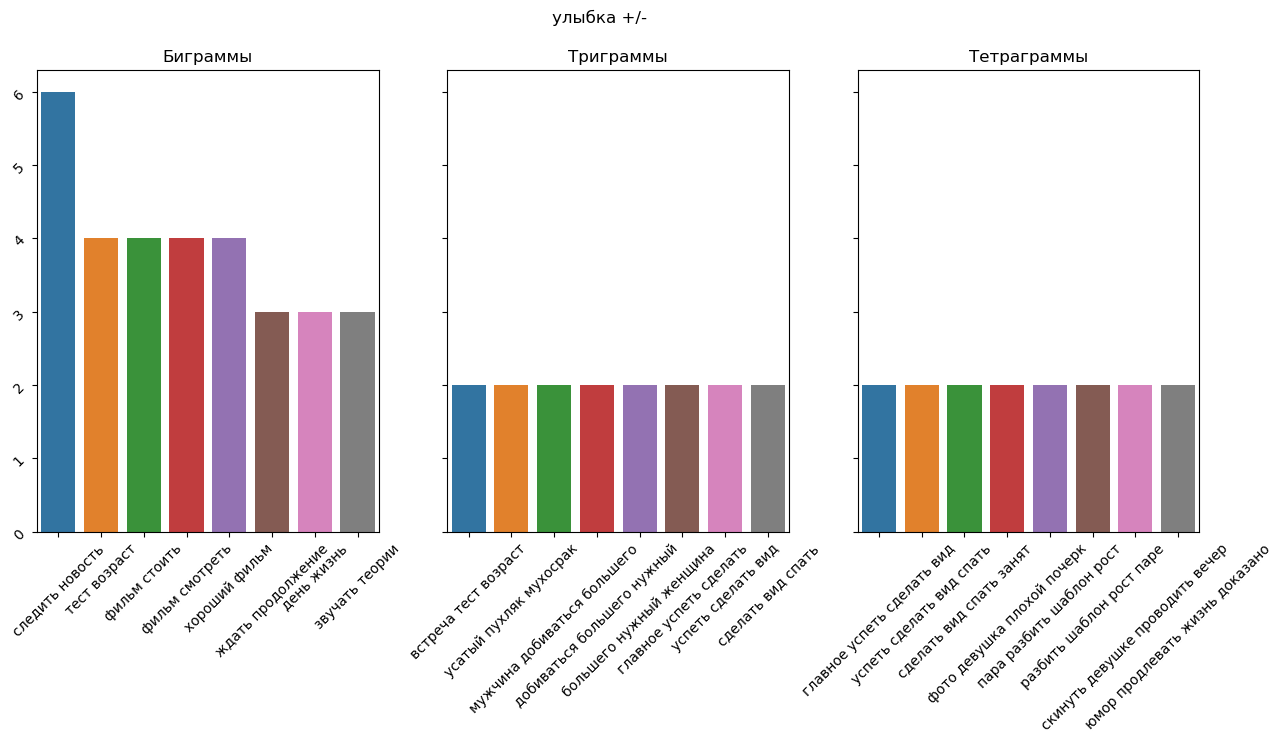

In [1970]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('улыбка +/-')

#sns.barplot( list(dict(smile_positive_negative_unigrams).keys()), list(dict(smile_positive_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(smile_positive_negative_bigrams).keys()), list(dict(smile_positive_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(smile_positive_negative_trigrams).keys()), list(dict(smile_positive_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(smile_positive_negative_tetragrams).keys()), list(dict(smile_positive_negative_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('smile_positive_negative.png')

In [1971]:
#2 no_emotion_neutral_skeptical

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

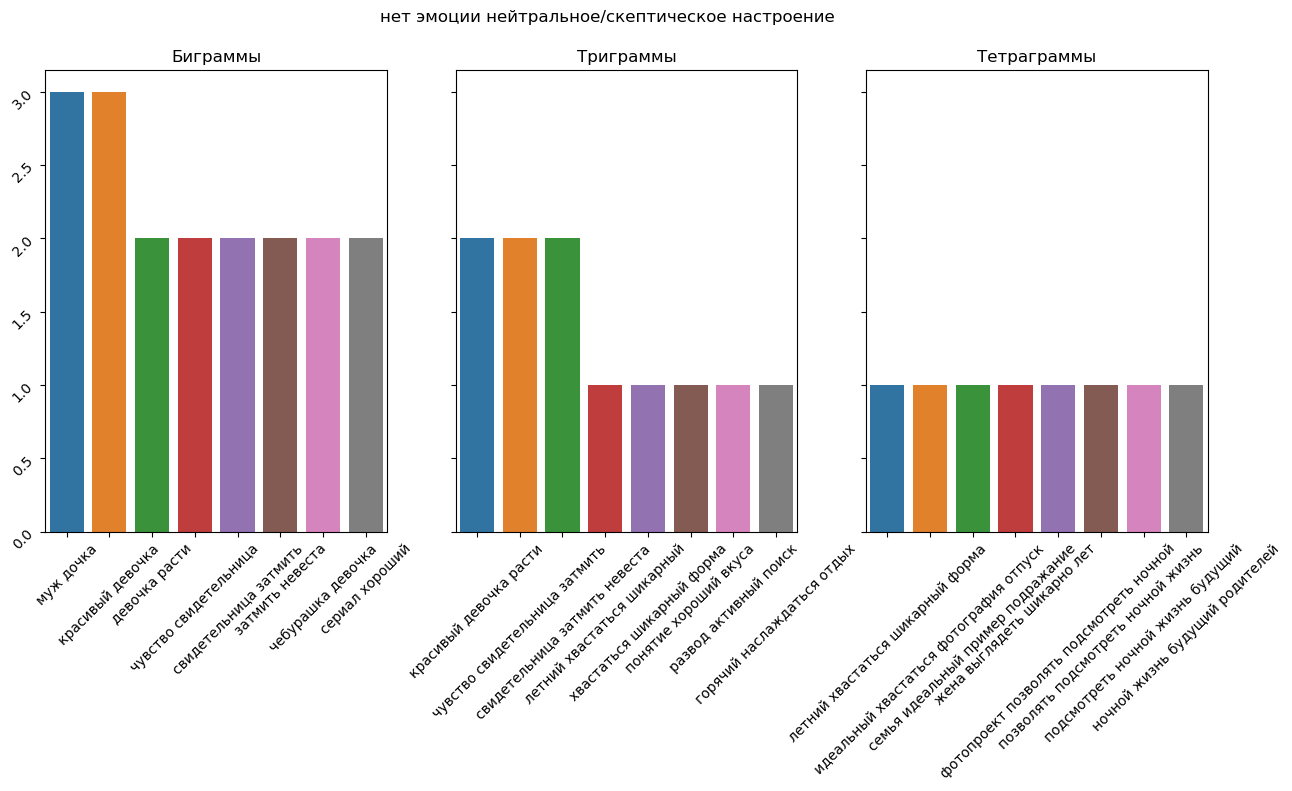

In [1972]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('нет эмоции нейтральное/скептическое настроение')

#sns.barplot( list(dict(no_emotion_neutral_skeptical_unigrams).keys()), list(dict(no_emotion_neutral_skeptical_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(no_emotion_neutral_skeptical_bigrams).keys()), list(dict(no_emotion_neutral_skeptical_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(no_emotion_neutral_skeptical_trigrams).keys()), list(dict(no_emotion_neutral_skeptical_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(no_emotion_neutral_skeptical_tetragrams).keys()), list(dict(no_emotion_neutral_skeptical_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('no_emotion_neutral_skeptical.png')

In [1973]:
# 3 joy_positive

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

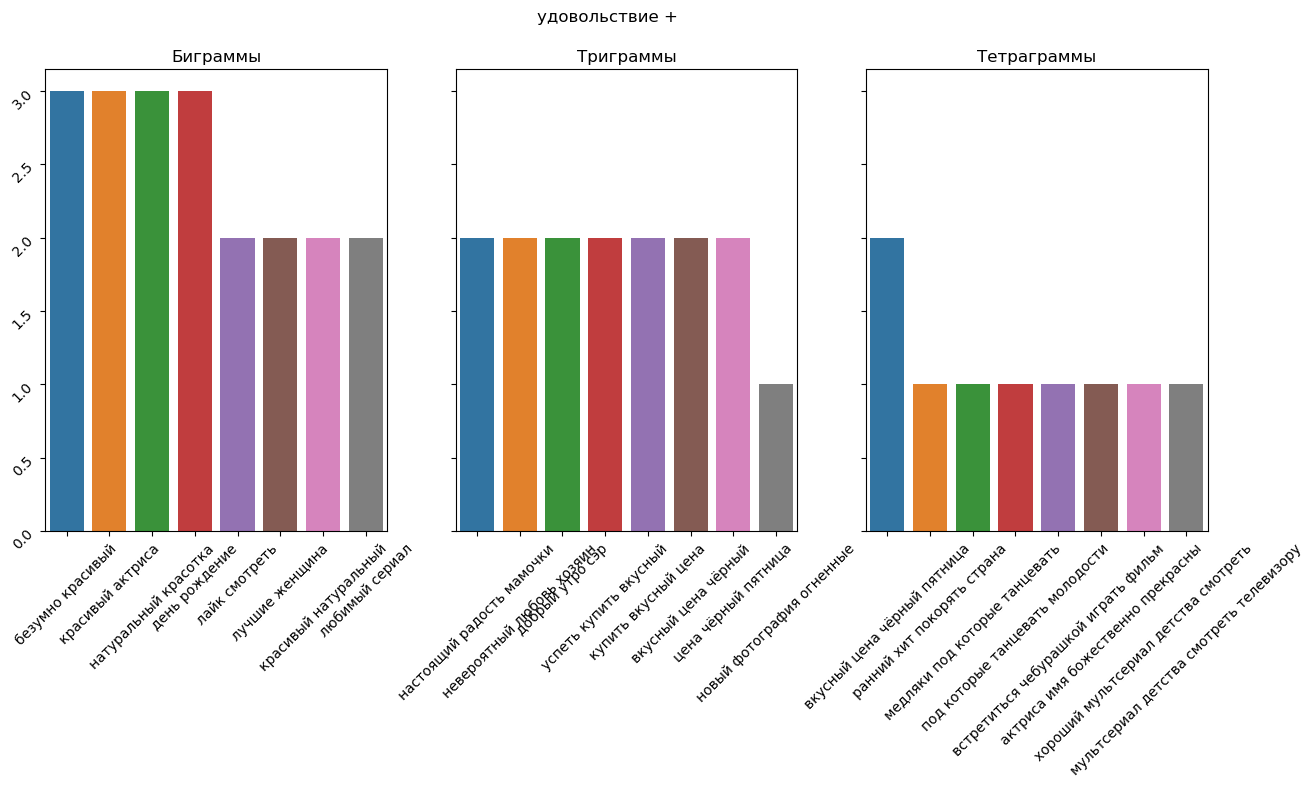

In [1974]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('удовольствие +')

#sns.barplot( list(dict(joy_positive_unigrams).keys()), list(dict(joy_positive_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(joy_positive_bigrams).keys()), list(dict(joy_positive_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(joy_positive_trigrams).keys()), list(dict(joy_positive_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(joy_positive_tetragrams).keys()), list(dict(joy_positive_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('joy_positive.png')

In [1975]:
#4 no_emotion_positive_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

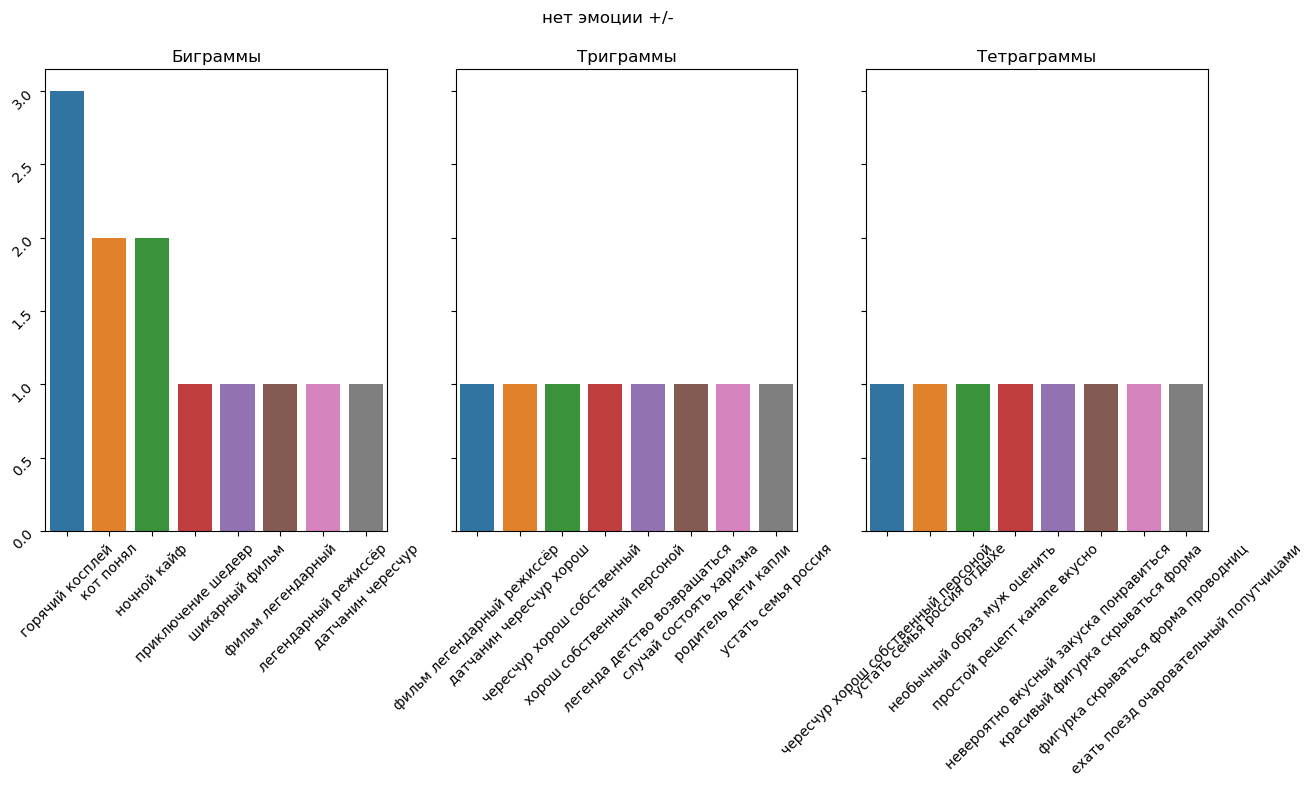

In [1976]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('нет эмоции +/-')

#sns.barplot( list(dict(no_emotion_positive_negative_unigrams).keys()), list(dict(no_emotion_positive_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(no_emotion_positive_negative_bigrams).keys()), list(dict(no_emotion_positive_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(no_emotion_positive_negative_trigrams).keys()), list(dict(no_emotion_positive_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(no_emotion_positive_negative_tetragrams).keys()), list(dict(no_emotion_positive_negative_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('no_emotion_positive_negative.png')

In [1977]:
# 5 sadness_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

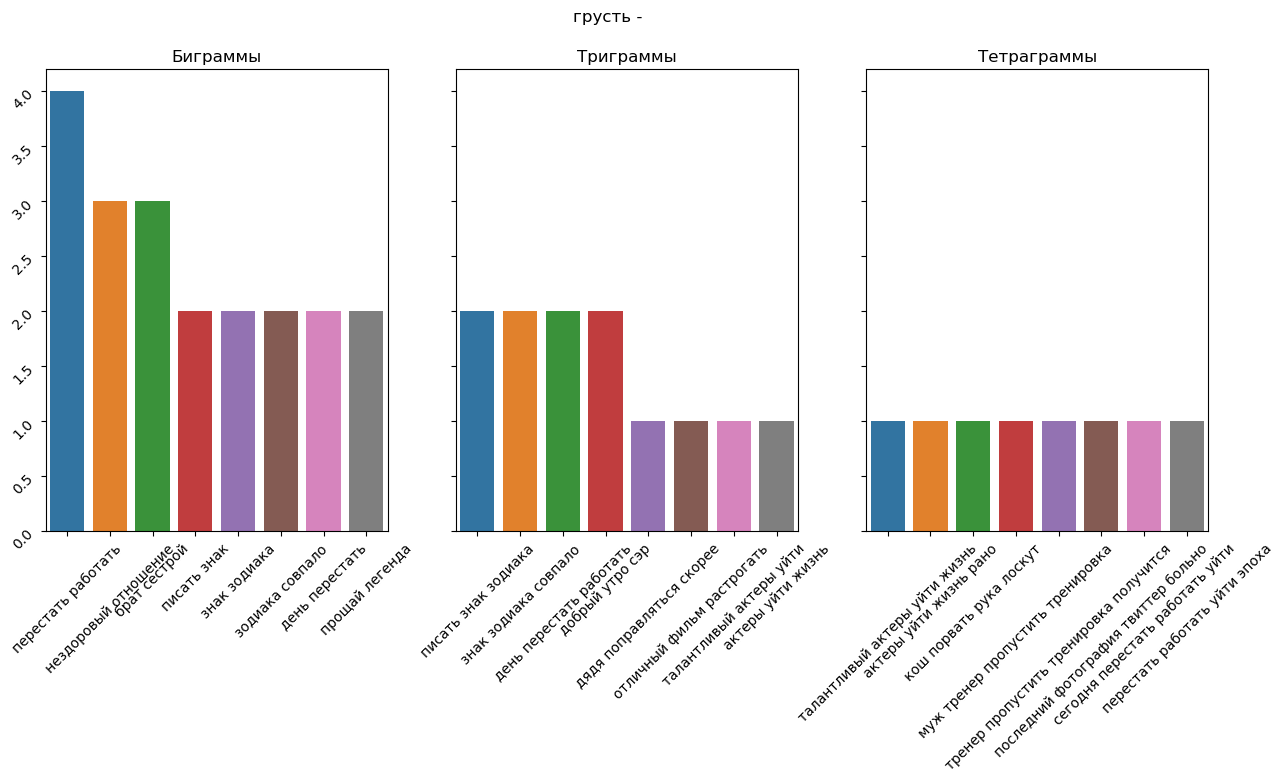

In [1978]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('грусть -')

#sns.barplot( list(dict(sadness_negative_unigrams).keys()), list(dict(sadness_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(sadness_negative_bigrams).keys()), list(dict(sadness_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(sadness_negative_trigrams).keys()), list(dict(sadness_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(sadness_negative_tetragrams).keys()), list(dict(sadness_negative_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('sadness_negativee.png')

In [1979]:
# 6 fear_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

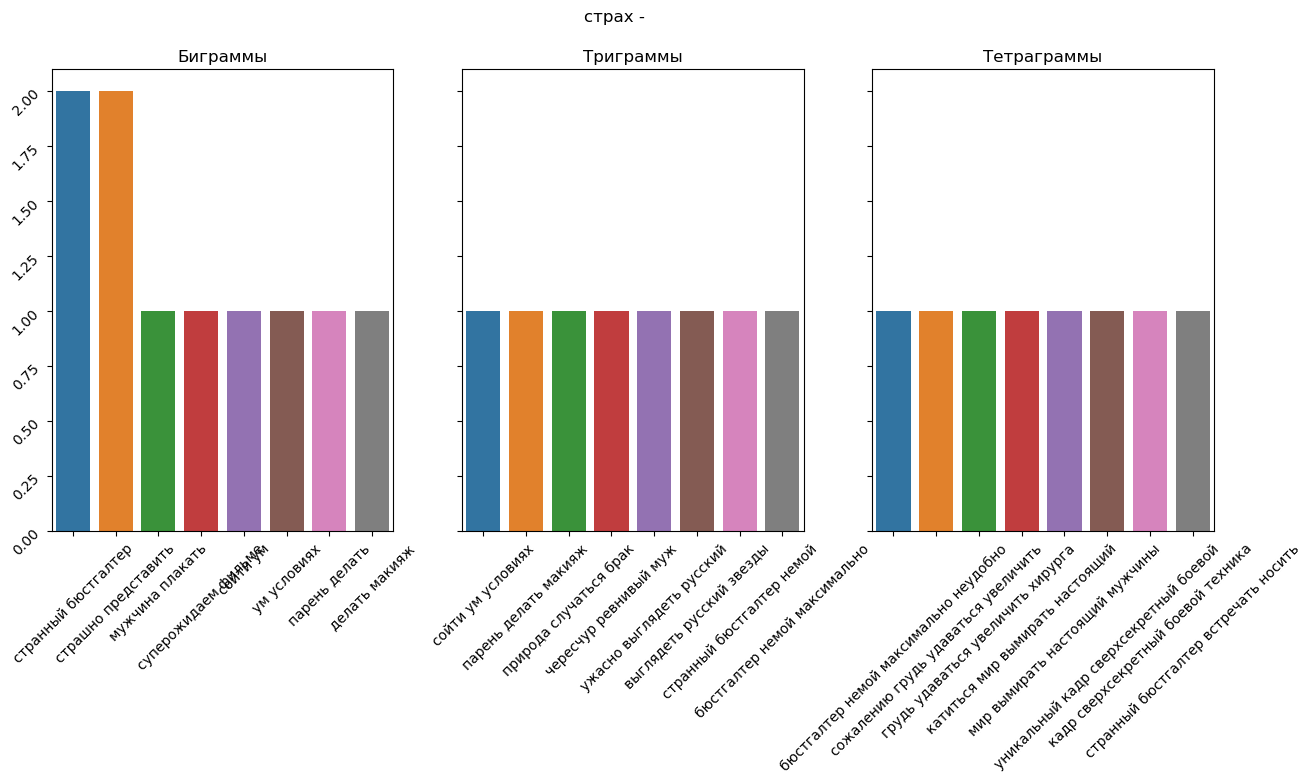

In [1980]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('страх -')

#sns.barplot( list(dict(fear_negative_unigrams).keys()), list(dict(fear_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(fear_negative_bigrams).keys()), list(dict(fear_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(fear_negative_trigrams).keys()), list(dict(fear_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(fear_negative_tetragrams).keys()), list(dict(fear_negative_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('fear_negative.png')

In [1981]:
# 7 shame_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

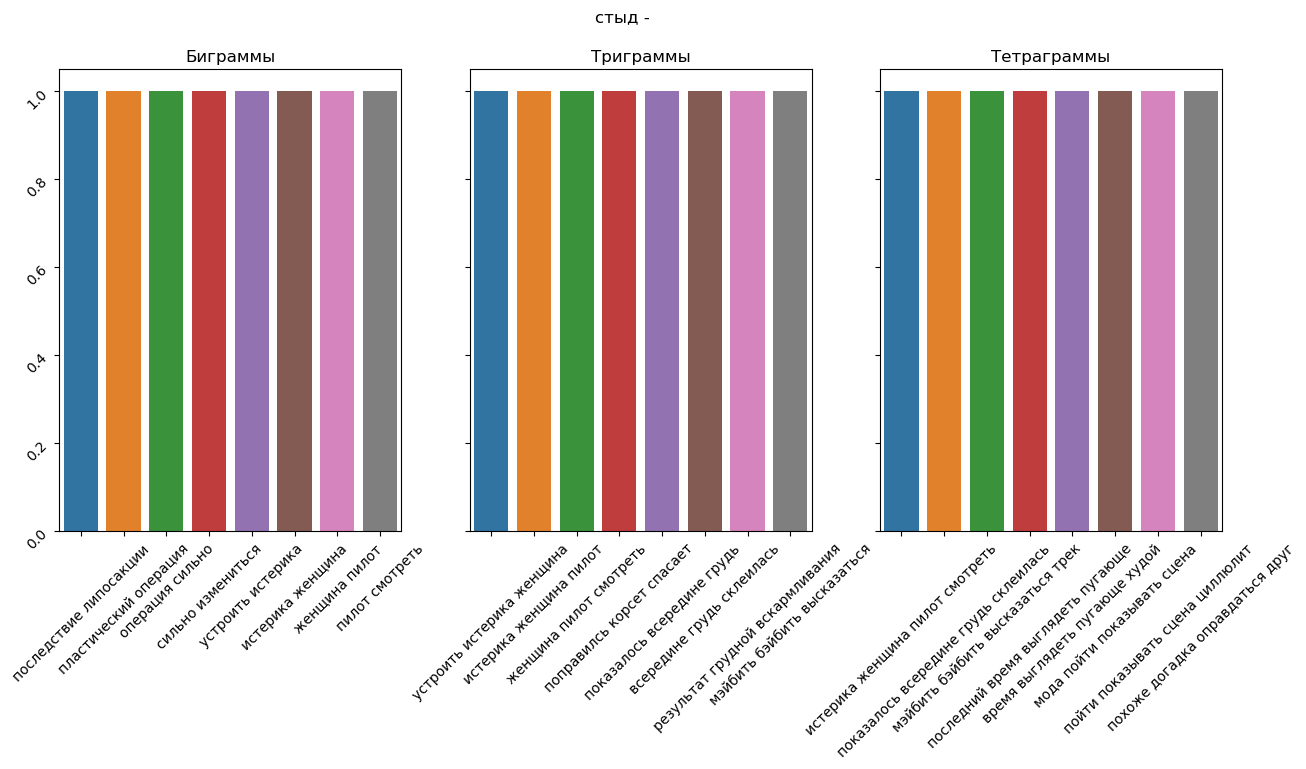

In [1982]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('стыд -')

#sns.barplot( list(dict(shame_negative_unigrams).keys()), list(dict(shame_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(shame_negative_bigrams).keys()), list(dict(shame_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(shame_negative_trigrams).keys()), list(dict(shame_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(shame_negative_tetragrams).keys()), list(dict(shame_negative_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('shame_negative.png')

In [1983]:
# 8 anger_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

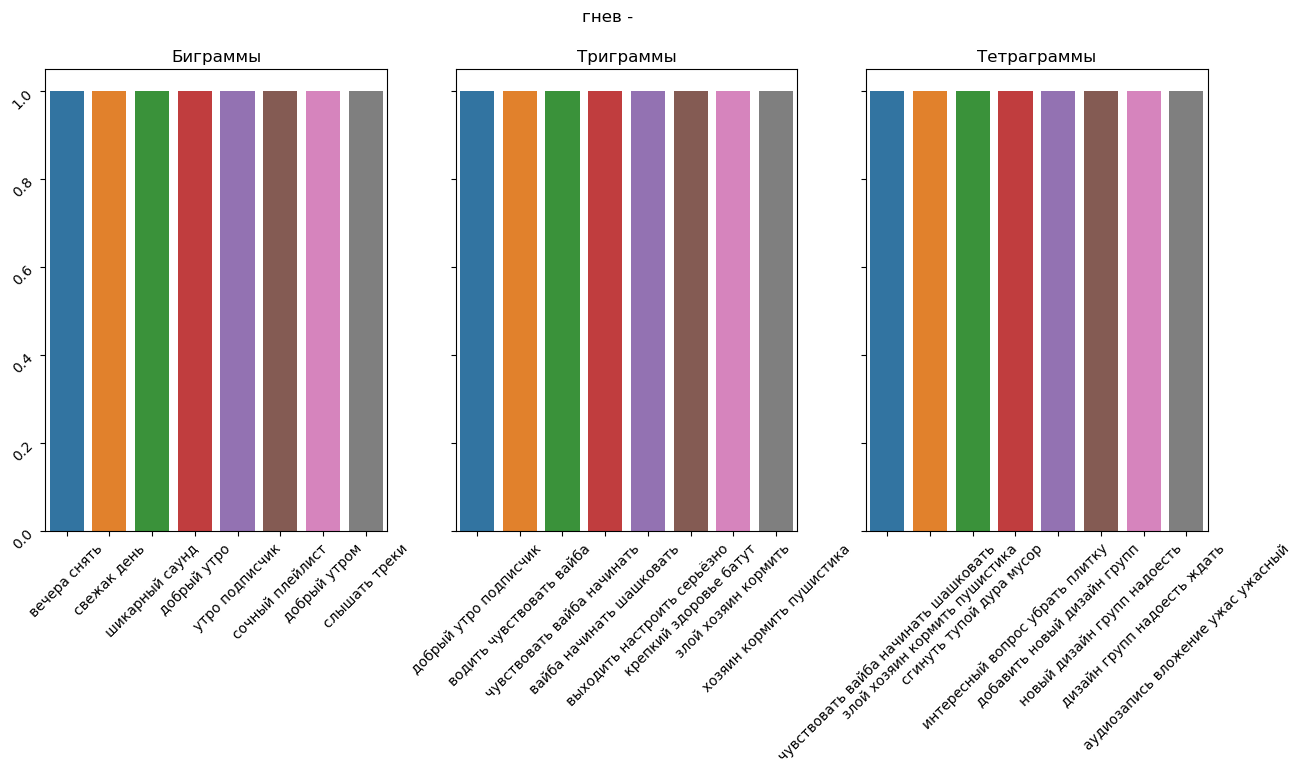

In [1984]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('гнев -')

#sns.barplot( list(dict(anger_negative_unigrams).keys()), list(dict(anger_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(anger_negative_bigrams).keys()), list(dict(anger_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(anger_negative_trigrams).keys()), list(dict(anger_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(anger_negative_tetragrams).keys()), list(dict(anger_negative_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('anger_negative.png')

In [1985]:
#9 disgust_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

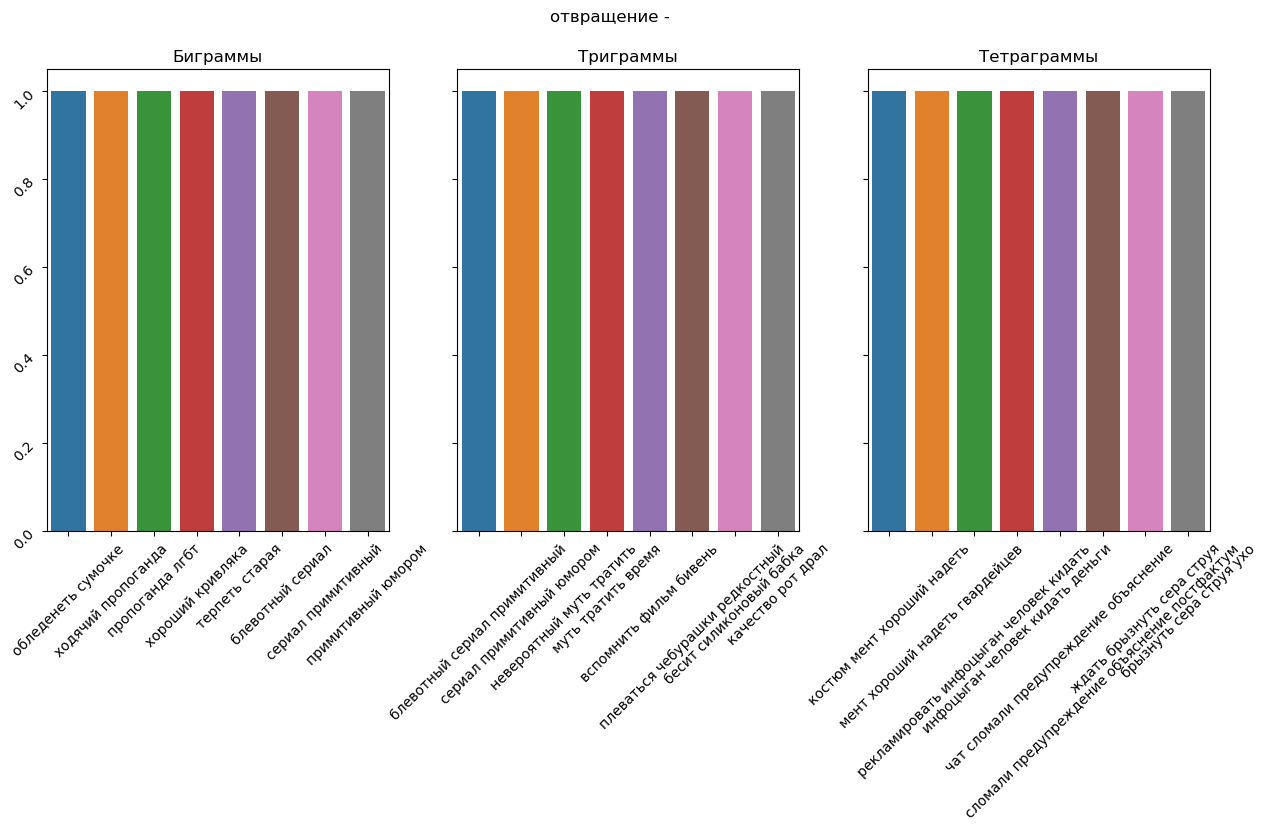

In [1986]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('отвращение -')

#sns.barplot( list(dict(disgust_negative_unigrams).keys()), list(dict(disgust_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(disgust_negative_bigrams).keys()), list(dict(disgust_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(disgust_negative_trigrams).keys()), list(dict(disgust_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(disgust_negative_tetragrams).keys()), list(dict(disgust_negative_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('disgust_negative.png')

In [1987]:
# 10 surprise_positive_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

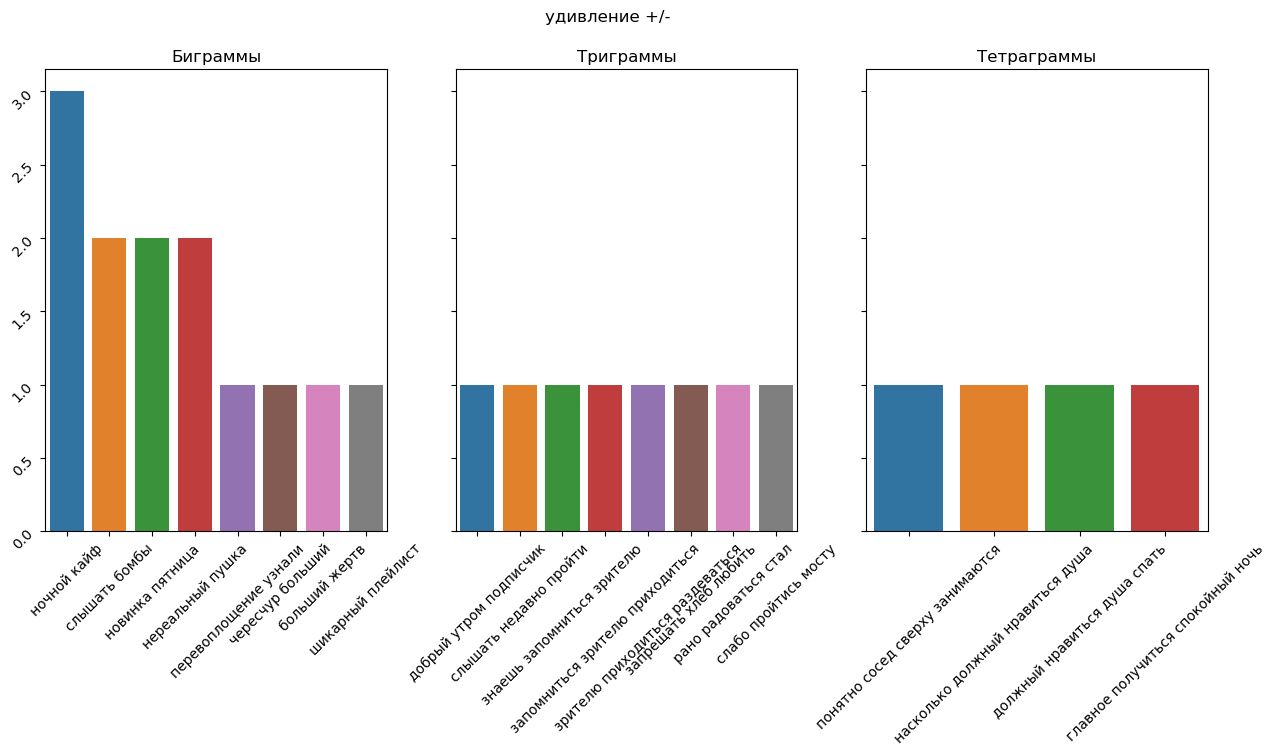

In [1988]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('удивление +/-')

#sns.barplot( list(dict(surprise_positive_negative_unigrams).keys()), list(dict(surprise_positive_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(surprise_positive_negative_bigrams).keys()), list(dict(surprise_positive_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(surprise_positive_negative_trigrams).keys()), list(dict(surprise_positive_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(surprise_positive_negative_tetragrams).keys()), list(dict(surprise_positive_negative_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('surprise_positive_negative.png')

In [1989]:
# 11 disgust_neutral_skeptical

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

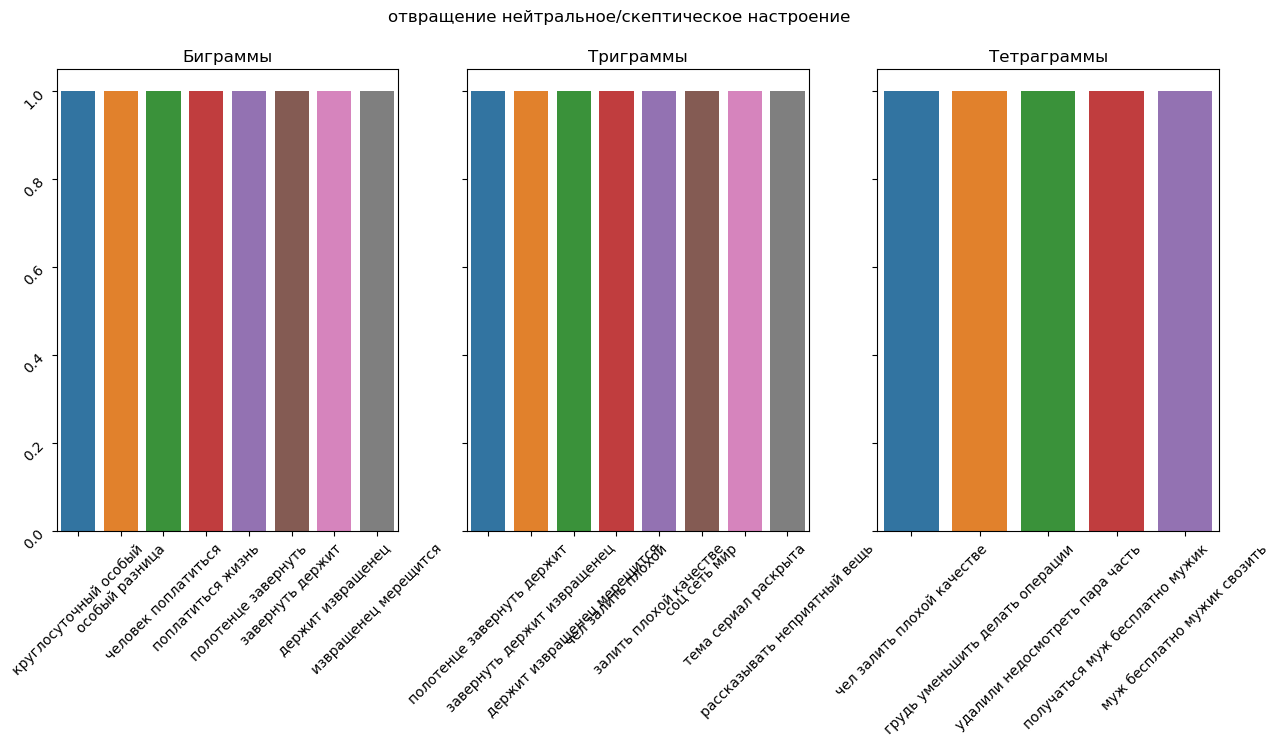

In [1990]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('отвращение нейтральное/скептическое настроение')

#sns.barplot( list(dict(disgust_neutral_skeptical_unigrams).keys()), list(dict(disgust_neutral_skeptical_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(disgust_neutral_skeptical_bigrams).keys()), list(dict(disgust_neutral_skeptical_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(disgust_neutral_skeptical_trigrams).keys()), list(dict(disgust_neutral_skeptical_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(disgust_neutral_skeptical_tetragrams).keys()), list(dict(disgust_neutral_skeptical_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('disgust_neutral_skeptical.png')

In [1991]:
# 12 surprise_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

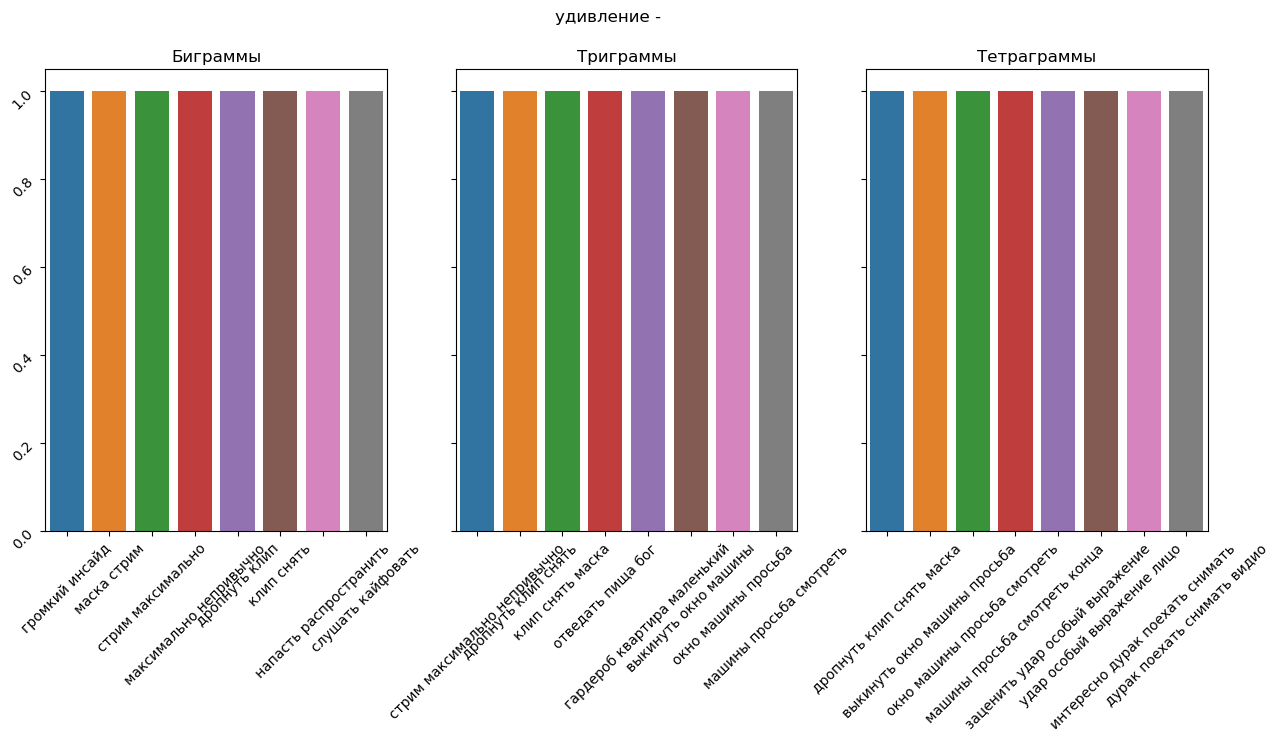

In [1992]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('удивление -')

#sns.barplot( list(dict(surprise_negative_unigrams).keys()), list(dict(surprise_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(surprise_negative_bigrams).keys()), list(dict(surprise_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(surprise_negative_trigrams).keys()), list(dict(surprise_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(surprise_negative_tetragrams).keys()), list(dict(surprise_negative_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('surprise_negative.png')

In [1993]:
# 13 no_emotion_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

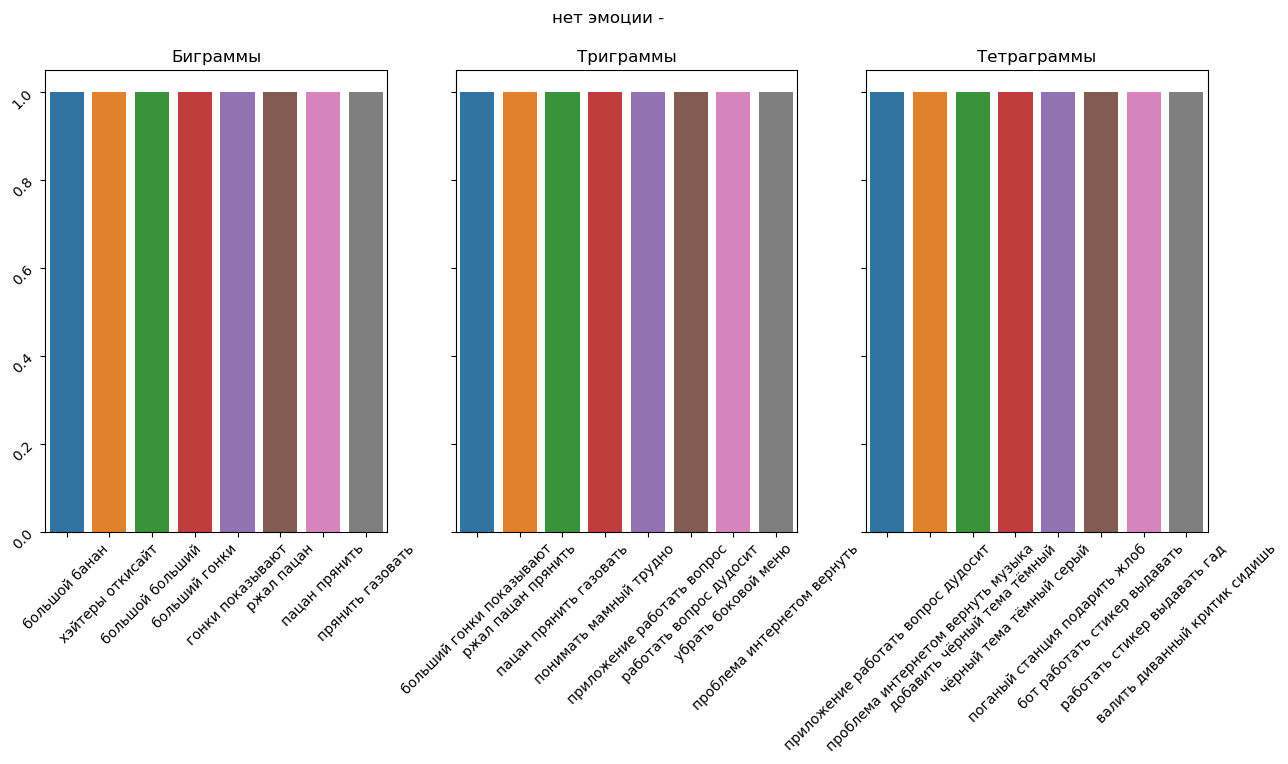

In [1994]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('нет эмоции -')

#sns.barplot( list(dict(no_emotion_negative_unigrams).keys()), list(dict(no_emotion_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(no_emotion_negative_bigrams).keys()), list(dict(no_emotion_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(no_emotion_negative_trigrams).keys()), list(dict(no_emotion_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

sns.barplot( list(dict(no_emotion_negative_tetragrams).keys()), list(dict(no_emotion_negative_tetragrams).values()),ax=axes[2],)
axes[2].set_title('Тетраграммы')
axes[2].tick_params(labelrotation=45)
#fig.savefig('no_emotion_negative.png')

In [1995]:
# 14 sadness_positive_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


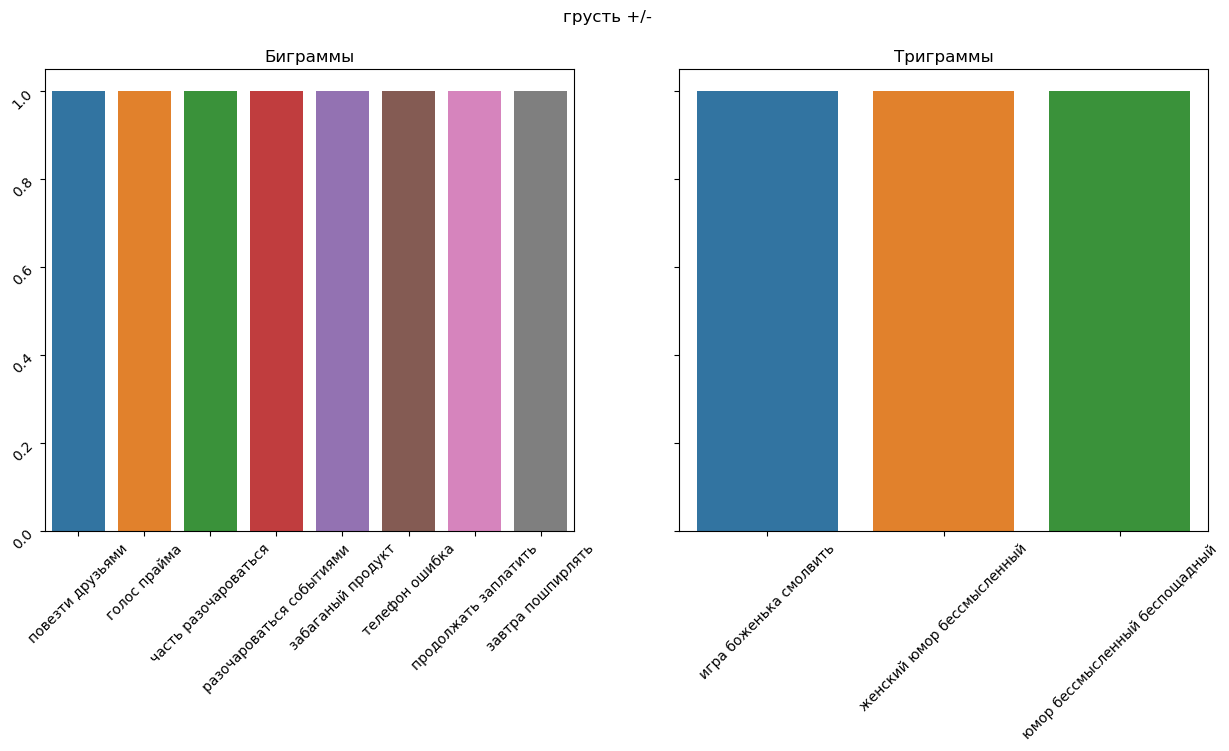

In [1998]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
fig.suptitle('грусть +/-')

#sns.barplot( list(dict(sadness_positive_negative_unigrams).keys()), list(dict(sadness_positive_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(sadness_positive_negative_bigrams).keys()), list(dict(sadness_positive_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(sadness_positive_negative_trigrams).keys()), list(dict(sadness_positive_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

# sadness_positive_negative_tetragrams is empty
#sns.barplot( list(dict(sadness_positive_negative_tetragrams).keys()), list(dict(sadness_positive_negative_tetragrams).values()),ax=axes[2],)
#axes[2].set_title('Тетраграммы')
#axes[2].tick_params(labelrotation=45)
#fig.savefig('sadness_positive_negative.png')

In [1999]:
# 15 fear_positive_negative

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


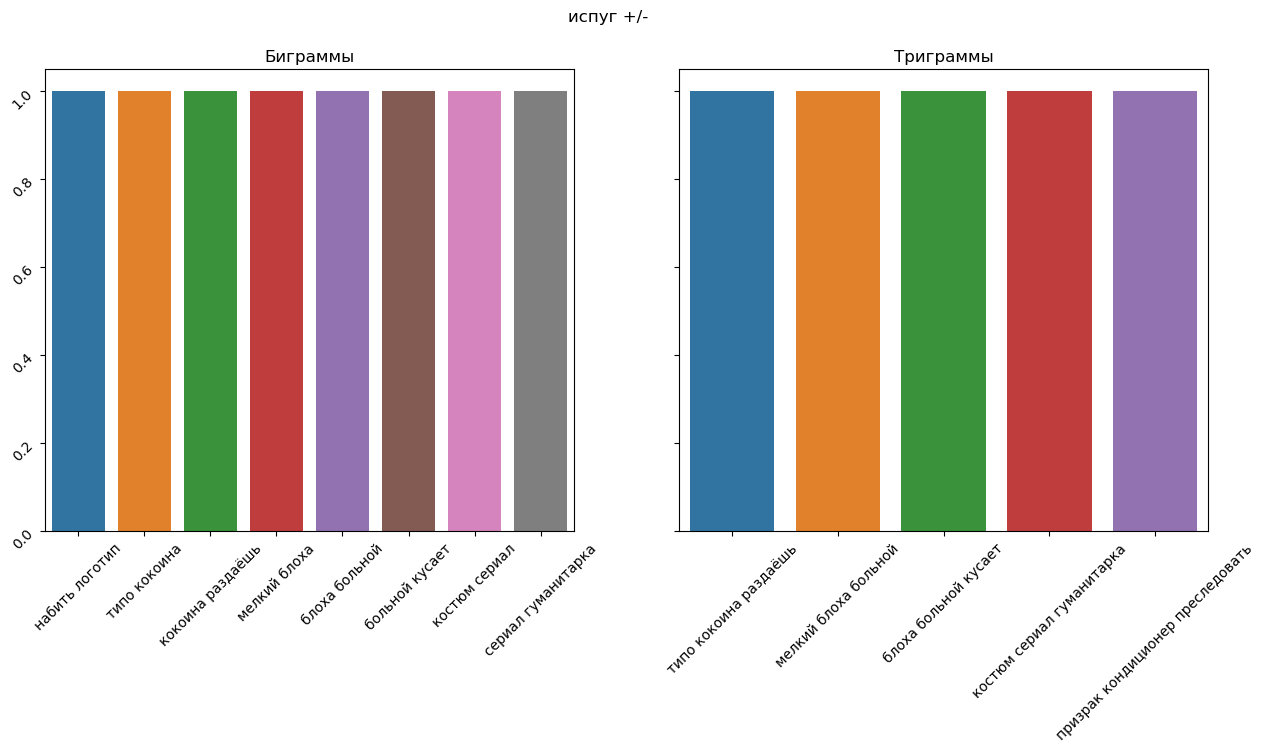

In [2002]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
fig.suptitle('испуг +/-')

#sns.barplot( list(dict(fear_positive_negative_unigrams).keys()), list(dict(fear_positive_negative_unigrams).values()),ax=axes[0],)
#axes[0].set_title('Unigrams')
#axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(fear_positive_negative_bigrams).keys()), list(dict(fear_positive_negative_bigrams).values()),ax=axes[0],)
axes[0].set_title('Биграммы')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(fear_positive_negative_trigrams).keys()), list(dict(fear_positive_negative_trigrams).values()),ax=axes[1],)
axes[1].set_title('Триграммы')
axes[1].tick_params(labelrotation=45)

# fear_positive_negative_tetragrams is empty
#sns.barplot( list(dict(fear_positive_negative_tetragrams).keys()), list(dict(fear_positive_negative_tetragrams).values()),ax=axes[2],)
#axes[2].set_title('Тетраграммы')
#axes[2].tick_params(labelrotation=45)
#fig.savefig('fear_positive_negative.png')